# Introduction
Logistic regression is a supervised ML algorithm that is used when the dataset has a target variable that is of categorical type. It performs the task of classification.

The equation of line is used to build the model that performs the task of classification. This divides the plane into 2 parts with each half containing the points belonging to the same class. This description is merely for understanding and is not true (entirely).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (20, 5)

# Step Funtion as the Activation Function for Logistic Regression
Step function, also known as a Heaviside function, is a mathematical function that outputs a specific value based on whether the input is less than, equal to, or greater than a certain threshold.

Meaning the function outputs a certain value (usually 0) when input is less than 0, and another value (usually 1) when the input is greater than 0. In other words, the function outputs a constant value (usually 0 or 1) for a certain range of input values.

Mathematically, the equation of the straight line is given by,

$y = w^T x + w_0$

Where,
- $y \in (-\infty, \infty)$

According to step function, $f(y) = {0, 1}$. Therefore, $f(y) = \begin{cases}1, & \text{if } y \geq 0, \\0, & \text{if } y < 0.\end{cases}$.

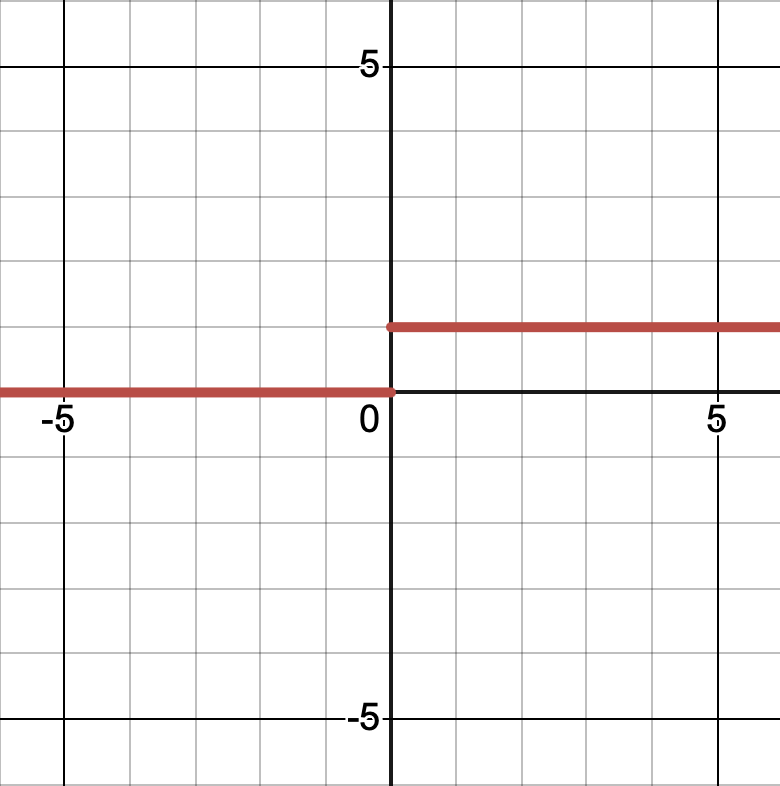

### Limitations of step function
- A step function outputs a 0 or 1 abruptly, with no values in between. This makes it difficult to model the gradual change in probabilities that logistic regression aims for.
- The step function has a zero gradient everywhere except for the transition point. This is problematic for gradient descent based optimization algorithms used to train logistic regression models. Without a smooth gradient, the model wouldn't be able to learn effectively through back-propagation.

### What is back propagation?
Back propagation is a technique used to efficiently train models like logistic regression with gradient descent.

Breakdown of how back propagation works,
1. Forward pass: Data goes through the model, calculations are made at each layer, and a final prediction is generated.
2. Error calculation: The difference (error) between the prediction and the actual class label is calculated.
3. Backward pass: The error is propagated backward through the model, layer by layer. At each layer, the gradient (rate of change) of the error with respect to that layer's weights and biases is calculated.
4. Weight update: Using these gradients, the weights and biases of the model are adjusted in a small way to minimize the overall error.

Imagine rolling a ball down a hill, back propagation helps in finding the steepest path (by calculating the gradients) to adjust the landscape (weights and biases) and get the ball (error) to the bottom (minimize).

This iterative process of forward pass, error calculation, backward pass, and weight update continues until the model reaches a desired level of accuracy. The smooth gradient of sctivation function (like sigmoid) is crucial for back propagation to work effectively.

# Sigmoid Function as the Activation Function for Logistic Regression
The sigmoid function, also known as the logistic function, or squashing function, is a mathematical function widely used as the activation function in ML models, particularly in logistic regression for classification tasks. The sigmoid function takes a real number as input, and squashes it to a value between 0 and 1. The function's output smoothly transitions from 0 to 1 as the input increases.

The function is mathematically defined as, 

$\sigma(z) = \frac{1}{1 + e ^{-z}}$

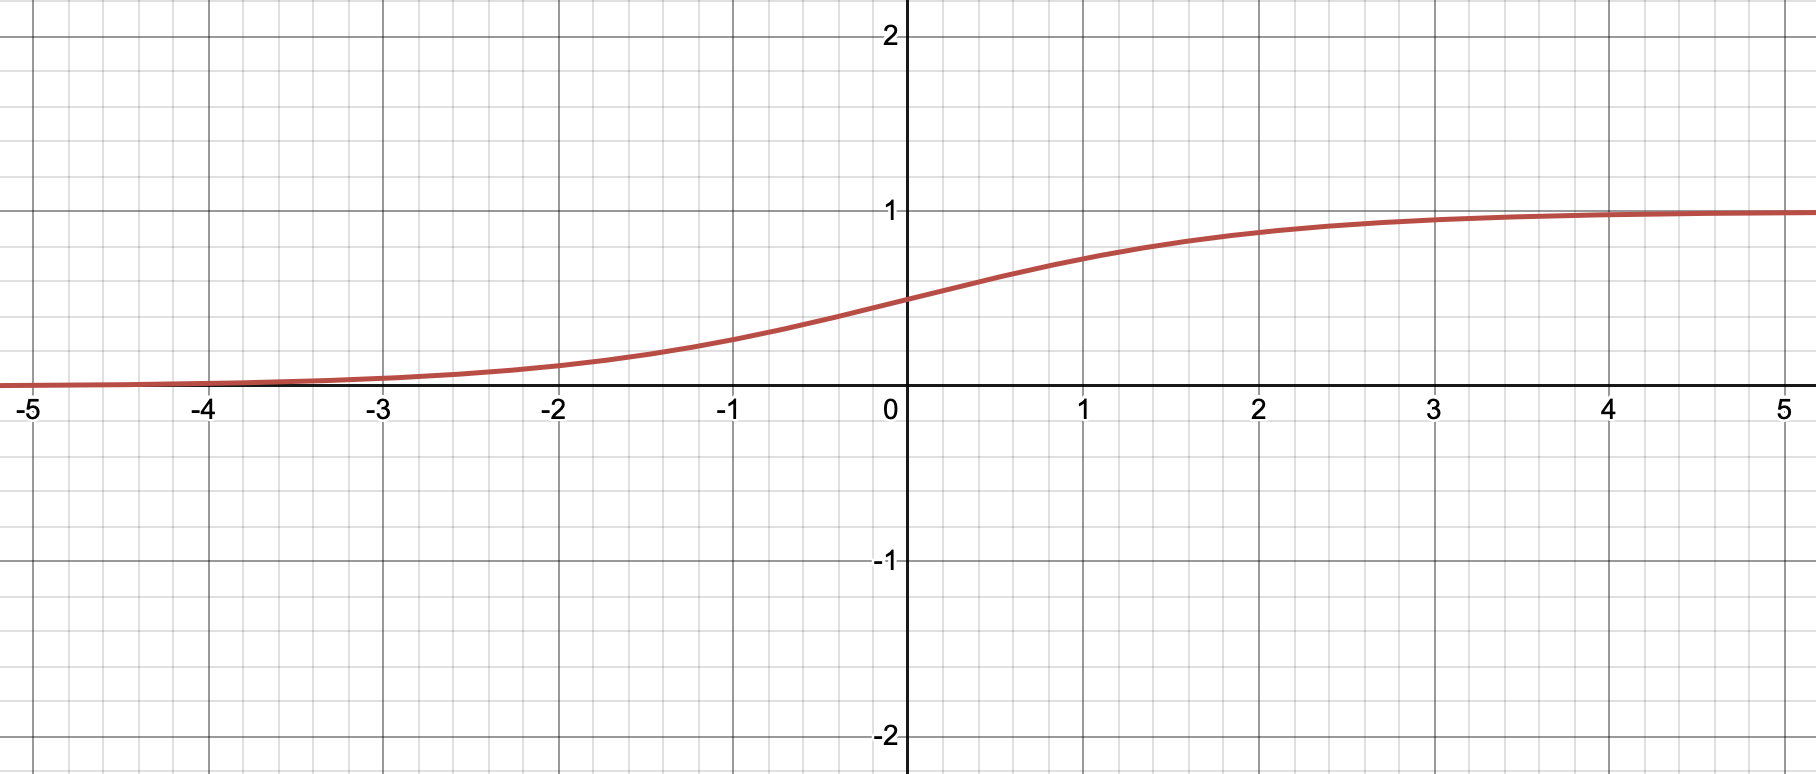

### Advantages of sigmoid function
- Unlike the step function's abrupt transition, the sigmoid function's smooth output allows for a more nuanced representation of probabilities between 0 and 1. This is crucial for logistic regression to model the gradual change in the likelihood of a class membership.
- The sigmoid function has a non-zero gradient throughout its entire range. This is essential for gradient-based optimization algorithms used to train most ML models. The non-zero gradient allows the model to learn effectively by back propagating the error and adjusting the weights of the model based on how they affect the output probability.

### Code implementation of sigmoid function

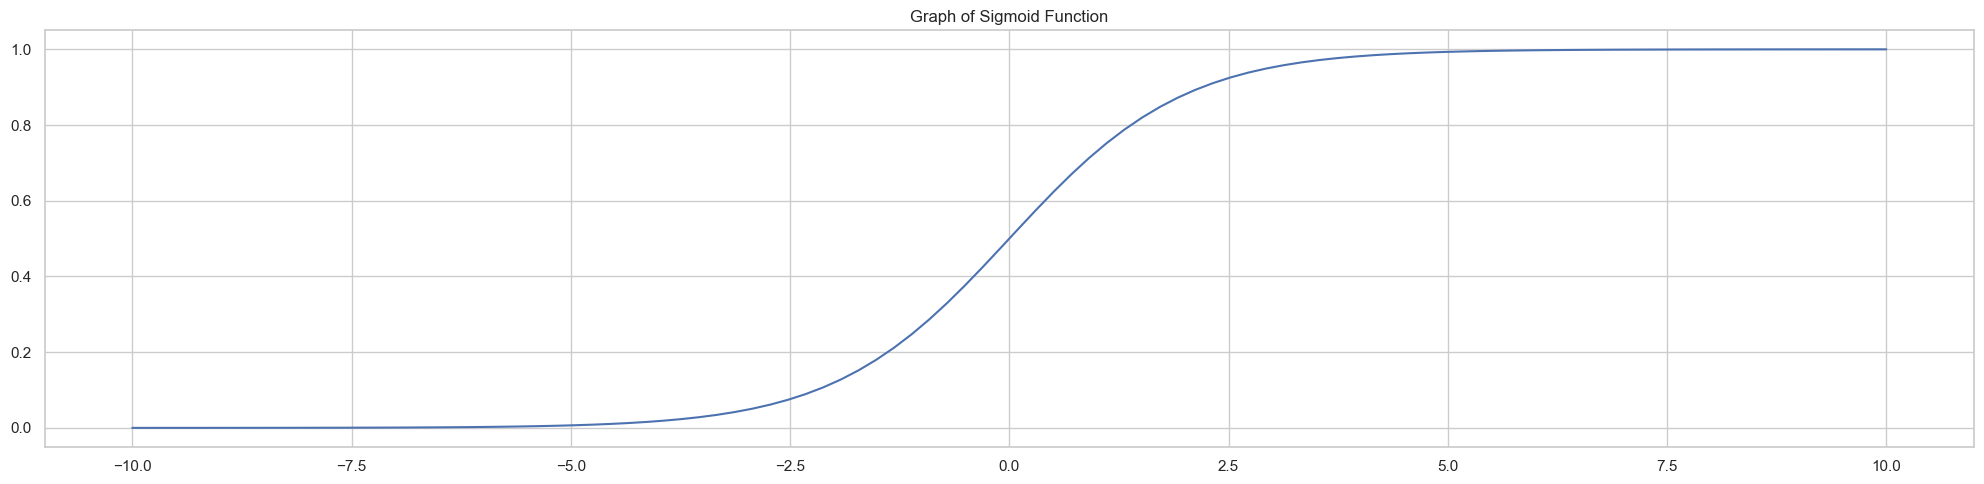

In [3]:
def sigmoid_func(x):
	return 1/ (1 + (np.e ** -x))

# plotting the values
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 100)
y = sigmoid_func(x)
plt.plot(x, y)
plt.title("Graph of Sigmoid Function")
plt.tight_layout()
plt.show()

# Connecting with Probabilities
- For some given value of distance of a point from the line z, say, $z = (w^T * x) + w_0$, the sigmoid function is applied. As a result a predicted value is obtained (y_pred). The range of the predicted value is between 0 and 1.
- The valu obtained after applying sigmoid function is the probability value of a point belonging to class 0, or class 1. If the point is very far away, the probability of it belonging to a certain class is less.
- In most of the scenarios, all the points are modeled with respect to conditional probability of them belonging to class 1.
- In order to find if some point belongs to class 0, $(1 - P(Class_1))$ can be found.
- Say for a point $z_1$, there is a 0.26 chance of the point belonging to class 1, then there is a 0.74 chance of the point belonging to class 0.

# How to Find the Best Values of W's?
- The predicted value is given by, $y_i = \sigma(w^T * x + w_0)$.
- The MSE for linear regression is given by, $MSE = \frac{1}{n} \sum_{i = 1}^{n}(y_i - (w^Tx + w_0))^2$.
- The MSE for logistic regression is given by, $MSE = \frac{1}{n} \sum_{i = 1}^{n}(y_i - \sigma(w^Tx + w_0))^2$.
- The above equation is differentiable, but there is one big challenge, i.e., if the graph of this function is plotted, it would turn out to be a non-convex function.
- Logistic regression is a classification task, where the model predicts class labels (0 or 1) for data points. MSE is not ideal for classification because it penalizes the model for even small deviations from the target class label, regardless of the direction of the error. Hence, this is not preferred as the cost or loss function for logistic regression.

# What is a Non-Convex Function?
In mathematics, a non-convex function is a function whose graph does not curve inwards everywhere.

### Convex v. non-convex
- Convex function: Imagine placing a straight edge on the function's graph. If the entire graph falls below (or above) the straight edge for any two points on the curve, the function is convex. Intuitively, it looks like a bowl or a cup.
- Non-convex function: On the other hand, if the straight edge touches or intersects the curve somewhere in between those two points, the function is non-convex. It can have dips, bumps, or a combination of both, making it look like a hilly landscape.

### Impact in optimization
- Finding the minimum: Many optimization problems involve finding the minimum value (or maximum) of a function. For convex functions, there's only one global minimum (or maximum), which is the lowest (or highest) point on the curve. This makes it easier for optimization algorithms to find the optimal solution.
- Challenges with non-convex functions:  Non-convex functions can have multiple local minima (or maxima). These are dips (or bumps) in the curve that are lower (or higher) than their immediate surroundings, but not necessarily the absolute minimum (or maximum). Optimization algorithms might get stuck in these local minima, leading to suboptimal solutions.

### Analogy
Imagine searching for the lowest point in a valley. In a convex valley (like a bowl), there's only one bottom point. In a non-convex valley with multiple dips, you might end up in a local dip and miss the actual lowest point.

### Non-convexity in ML
Non-convex functions arise in various machine learning models, including logistic regression with the MSE loss function (as you mentioned). Understanding non-convexity helps us choose appropriate optimization algorithms and loss functions to train models effectively.

### Further reading
https://rumn.medium.com/convex-vs-non-convex-functions-why-it-matters-in-optimization-for-machine-learning-39cd9427dfcc#:~:text=A%20convex%20loss%20function%20has,to%20find%20the%20global%20minimum

# Negative Log-Likelihood Function/ Log-Loss Function
The problem of the loss function is divided into 2 parts,
1. When $y_i = 1$. The slope is a downward curved slope starting from top-left and ending at bottom-right. This is defined by $[-log(y_{pred})]$.

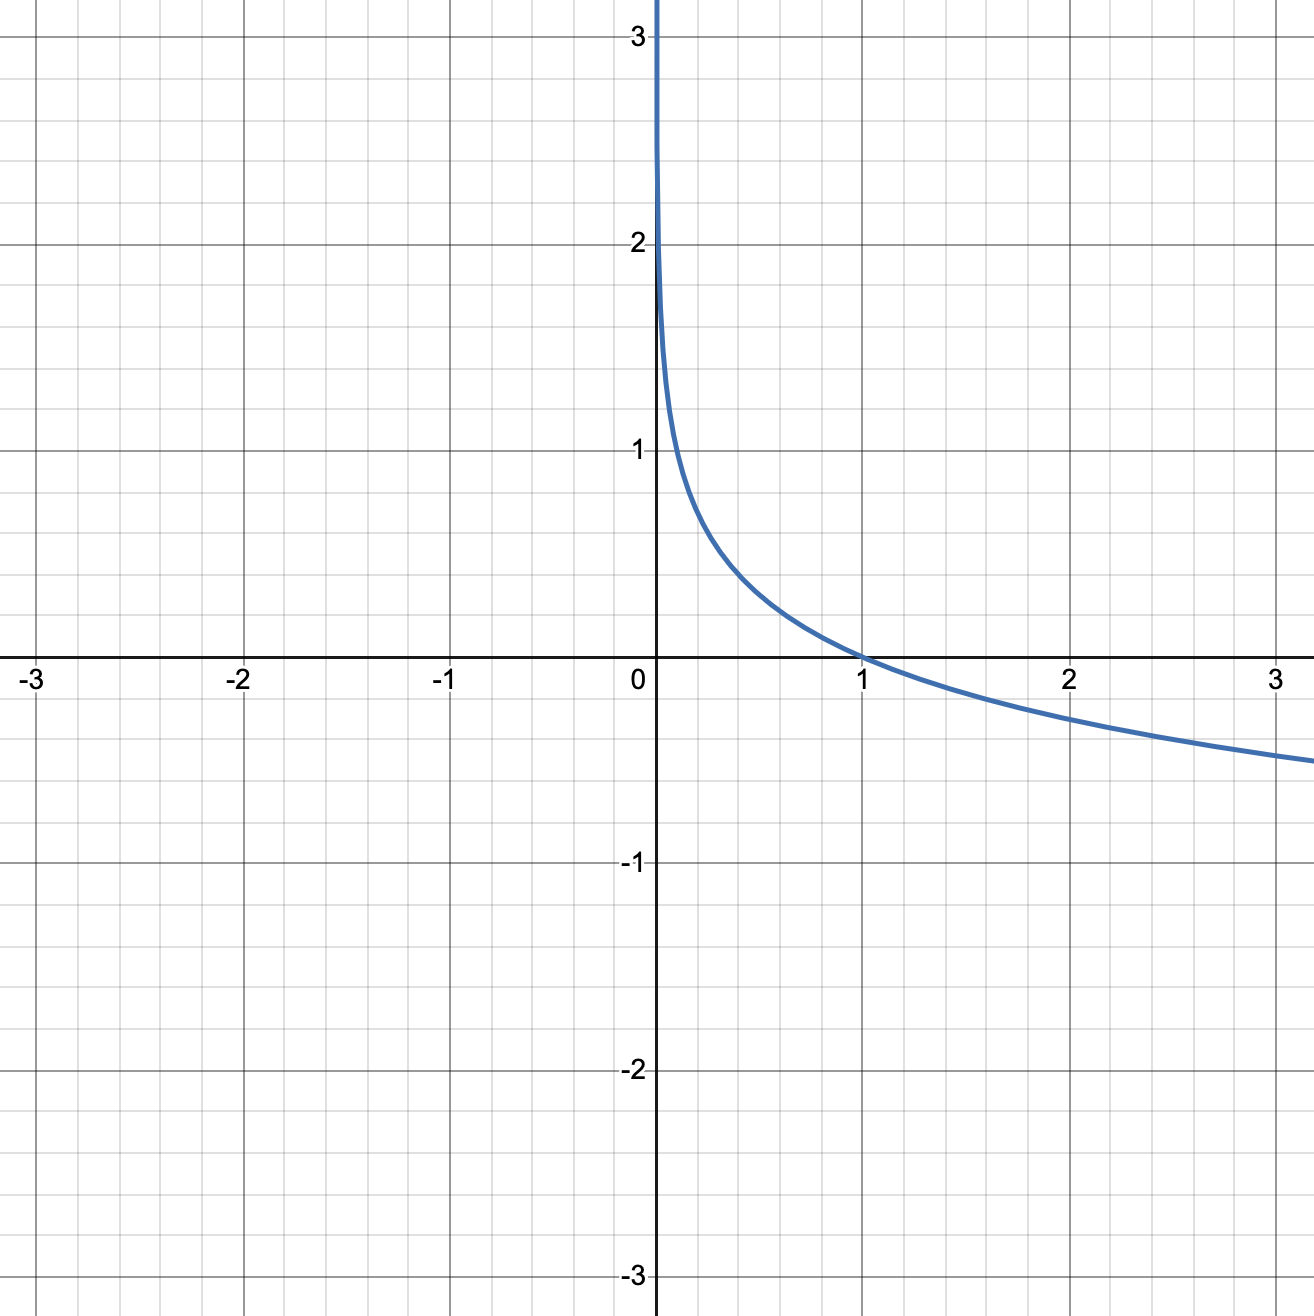

2. When $y_i = 0$. The slope is an upward curved slope starting from bottom-left and ending at top-right. This is defined by $[-log(1 - y_{pred})]$.

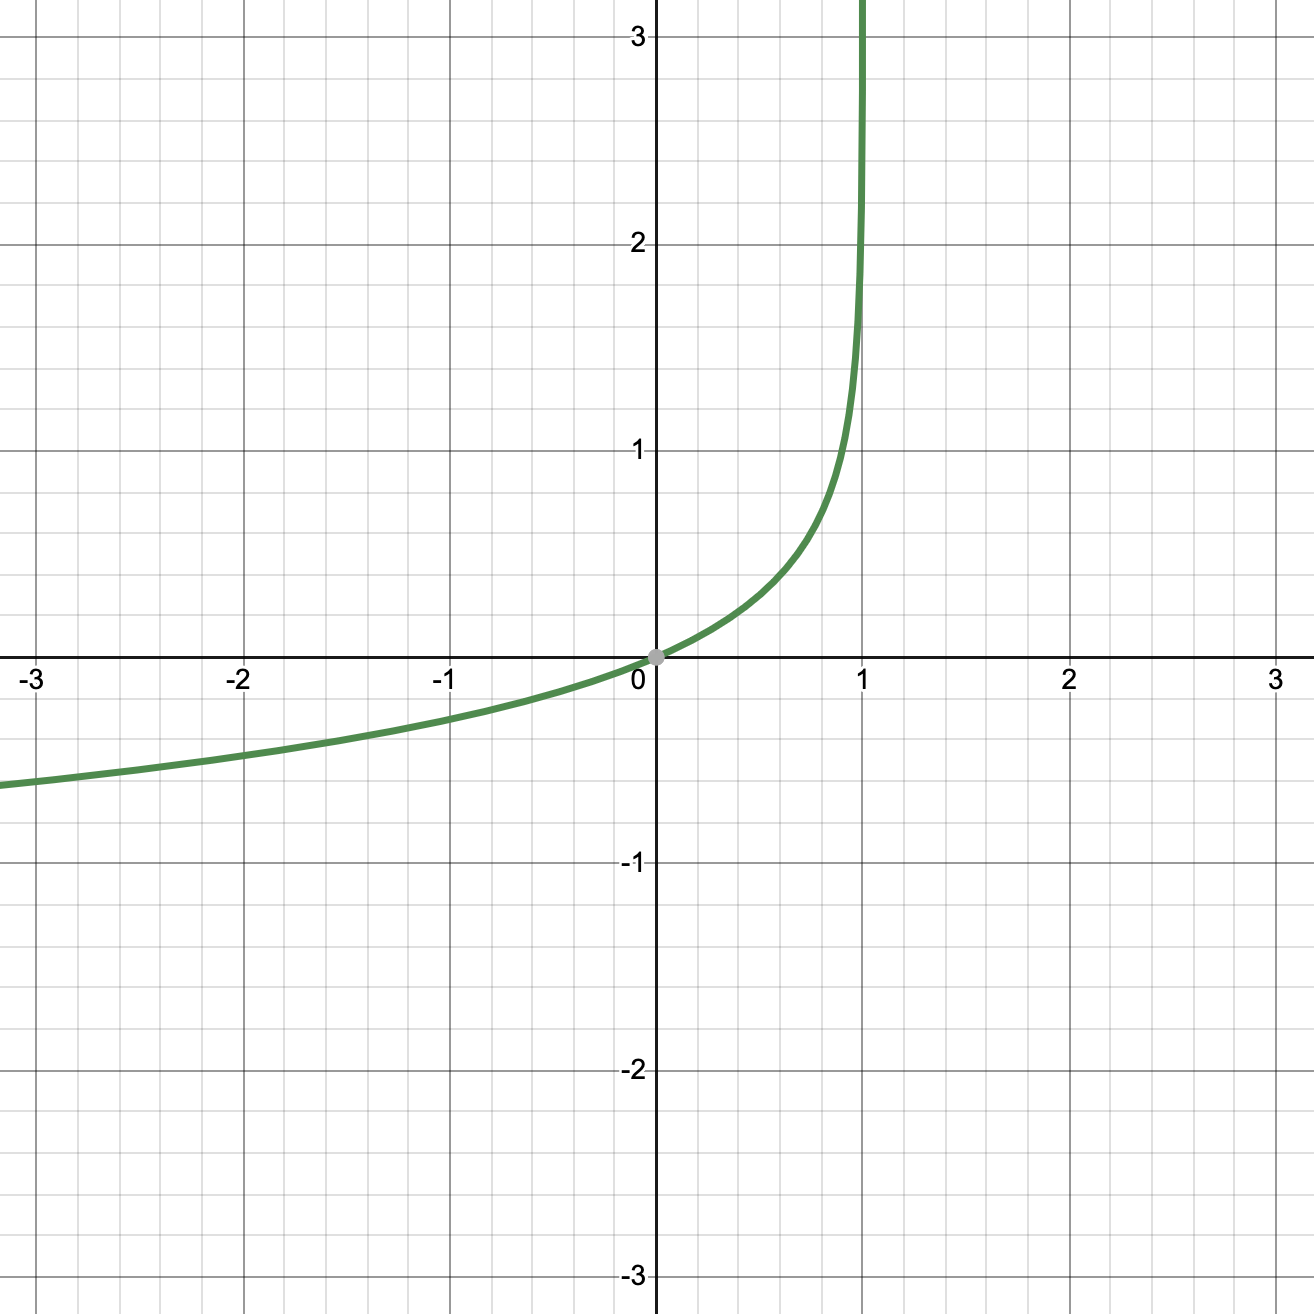

Consider that prediction is being made for class 1,
- Case 1: If $y_i = 1$, and $y_{pred} = 0$ the error would be approaching infinity.
- Case 2: If $y_i = 1$, and $y_{pred} = 0.99$, the error would be approaching 0 (i.e., approximately 0). For positive class it looks like a good function.
- Case 3: If $y_i = 0$, and $y_{pred} = 0.99$, the error would be very high as the predicted value says it belongs to class 1 with 0.99 chance, but the actual label says it belongs to class 0. Therefore, error is approaching infinity.
- Case 4: If $y_i = 0$, and $y_{pred} = 0$ the error would be approaching 0 (i.e., approximately 0).

The mathematical equation of log-loss is defined as,

$\large{\text{Log Loss} = (-y_i * \log(y_{pred})) - (1-y_i)*\log(1- y_{pred})}$

At any given point of time, only one part of the above equation will be active. Meaning, if the actual label is $y_i = 1$, then $(-y_i * \log(y_{pred}))$ will be active. If the actual label is $y_i = 0$, then $(-(1-y_i)*\log(1- y_{pred}))$ will be active.

### Code implementation of Log-Loss

In [4]:
def log_loss(y, y_cap):
	loss = - (y * np.log(y_cap)) - ((1 - y) * np.log(1 - y_cap))
	return loss

# Why is Negative Log-Loss Function Preferred as the Loss Function?
The negative log loss function, also known as the logistic loss or cross-entropy loss, is the preferred choice for logistic regression due to several key advantages over the Mean Squared Error (MSE) function.

### Convexity
- MSE challenge: The MSE function is non-convex with respect to the model's weights in logistic regression. This means the MSE landscape can have multiple local minima, making it difficult for optimization algorithms like gradient descent to find the global minimum during training. This can lead to suboptimal model performance.
- Cross-entropy advantage: The negative log-loss function on the other hand, is convex with respect to the weights. This creates a smoother landscape for optimization, allowing the algorithm to more efficiently navigate towards the global minimum, resulting in better convergence and potentially improved model performance.

### Focus on classification
- MSE's incapability: MSE is better suited for regression problems where the goal is to predict the continuous values. In logistic regression, the task is that of classification, where the aim is to predict discrete class labels (typically 0 or 1). MSE penalizes the difference between the predicted probability and the actual class label equally, regardless of the direction of the error. A prediction of 0.9 v. 0.1 for a class label of 1 is treated similarly by MSE.
- Cross-entropy alignment: The negative log loss function specifically addresses this issue. It focuses on minimizing the difference between the predicted probability distribution and the actual class distribution (0 or 1). It penalizes the model more heavily for significant deviations from the target class. For example, a prediction of 0.1 for a class label of 1 (heads in a coin flip analogy) incurs a higher penalty than a prediction of 0.9. This aligns well with the classification goals of logistic regression.

### Connection to maximum likelihood estimation
- Logistic Regression Goal: Logistic regression aims to find the model parameters (weights) that maximize the likelihood of observing the training data given the true class labels.
- Negative Log Loss and Likelihood: The negative log loss function has a direct connection to the likelihood function used in logistic regression. Minimizing the negative log loss function is equivalent to maximizing the likelihood function. This provides a statistically sound foundation for training the model.

### In summary, the negative log loss function offers several advantages over MSE in logistic regression
- It ensures a smoother optimization landscape (convexity).
- It aligns better with the classification goals by focusing on class label probabilities.
- It has a connection to the likelihood function, providing a statistically sound basis for model training.

These benefits contribute to more efficient training and potentially better classification performance in logistic regression models.

# Optimizing the Loss Function
The loss function is given by,

$\large{\text{Log Loss} = (-y_i * \log(y_{pred})) - (1-y_i)*\log(1- y_{pred})}$

The goal is to find, $\frac{∂L}{∂W}$, i.e., the partial derivative of L with respect to W.

For any, $\sigma(z) = \frac{1}{(1 + e^{-z})}$, applying the quotient rule results in,

$\sigma'(z) = \sigma(z) * (1 - \sigma(z))$

Where,
- $z = \sigma(w^Tx + w_0)$

Let the loss equation be divided into 2 parts, such that,
- $A = (-y_i * \log(y_{pred}))$
- $B = - (1-y_i)*\log(1- y_{pred})$

Partial derivative of A with respect to $w_j$ is,

$\frac{∂A}{∂w_j} = \frac{∂A}{∂y_{pred}}*\frac{∂y_{pred}}{∂z}*\frac{∂z}{∂w_j}$

Therefore,

$\frac{∂A}{∂y_{pred}} = \frac{y_i}{y_{pred}}$

$\frac{∂y_{pred}}{∂z} = y_{pred}*(1 - y_{pred})$

$\frac{∂z}{∂w_j} = x_j$

Finally,

$\frac{∂A}{∂w_j} = -(\frac{y_i}{y_{pred}} * y_{pred}*(1 - y_{pred}) * x_j)$

Similarly, the partial derivative of B with respect to $w_j$ is,

$\frac{∂B}{∂w_j} = \frac{∂B}{∂(1 - y_i)}*\frac{∂(1 - y_i)}{∂y_{pred}}*\frac{∂y_{pred}}{∂z}*\frac{∂z}{∂w_j}$

Therefore,

$\frac{∂B}{∂(1 - y_i)} = \frac{(1 - y_i)}{(1 - y_{pred})}$

$\frac{∂(1 - y_i)}{∂y_{pred}} = -1$

$\frac{∂y_{pred}}{∂z} = y_{pred}*(1 - y_{pred})$

$\frac{∂z}{∂w_j} =x_j$

Finally,

$\frac{∂B}{∂w_j} = -((\frac{(1 - y_i)}{(1 - y_{pred})})*(-1)*(y_{pred}*(1 - y_pred))*(x_j))$

$\frac{∂B}{∂w_j} = ((1-y_i)*y_{pred}*x_j)$

Therefore,

$\frac{∂L}{∂w_j} = \frac{∂A}{∂w_j} + \frac{∂B}{∂w_j}$

$\frac{∂L}{∂w_j} = (-(\frac{y_i}{y_{pred}} * y_{pred}*(1 - y_{pred}) * x_j)) + (((1-y_i)*y_{pred}*x_j))$

The gradient descent equation is,

$W_j = W_j - \eta(\frac{∂A}{∂W_j} + \frac{∂B}{∂W_j})$

# Accuracy of Logistic Regression
The predicted labels can be compared with the actual labels to find the accuracy. Accuracy is defined as,

$\text{Accuracy} = \frac{\text{Number of Correct Prediction}}{\text{Total Number of Predictions}}$

### Problems with accuracy as a metric
- In datasets where one class significantly outnumbers the others (e.g. fraud detection with very few fraud cases), model can achieve high accuracy simply by predicting the majority class most of the time. This doesn't necessarily translate to good performance in identifying the minority class, which might be more critical in some applications.
- It focuses on overall correctness. Meaning, accuracy does not provide insights into how well the model performs for each individual class. It is possible to have high overall accuracy but poor performance in identifying the less frequent class.

There are a couple of more robust metrics than accruacy, like Receiving Operator Characteristics (ROC), Precision, Recall, etc.,

# Code Implementation of Logistic Regression

### `sklearn` implementation of logistic regression

In [5]:
df = pd.read_csv("churn_logistic.csv")
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [6]:
x = df.drop(columns = ["Churn"])
x.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [7]:
columns = ["Day Mins", "Eve Mins", "Night Mins", "CustServ Calls", "Account Length"]
x = x[columns]
x.head()

,Day Mins,Eve Mins,Night Mins,CustServ Calls,Account Length
0,265.1,197.4,244.7,1,128
1,161.6,195.5,254.4,1,107
2,243.4,121.2,162.6,0,137
3,299.4,61.9,196.9,2,84
4,166.7,148.3,186.9,3,75


In [8]:
y = df["Churn"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [9]:
df["Churn"].value_counts()

Churn
0    2850
1    2850
Name: count, dtype: int64

In [10]:
y.shape

(5700,)

In [11]:
# reshaping y to (n, 1)
y = np.array(y).reshape(len(y), 1)
y.shape

(5700, 1)

In [12]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [13]:
# splitting the data into train set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, x_test.shape

((4560, 5), (1140, 5))

In [14]:
# scaling the data by standardizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
# training the logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [16]:
# predicting
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
y_test

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [18]:
# reshaping y_test
y_test = y_test.reshape(len(y_test))
y_test

array([1, 0, 1, ..., 1, 1, 1])

In [19]:
# calculate accuracy
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred)/ len(y_true)

# test accuracy
accuracy(y_test, y_pred)

0.49473684210526314

In [20]:
# train accuracy
y_pred_train = model.predict(x_train_scaled)
y_train = y_train.reshape(len(y_train))
accuracy(y_train, y_pred_train)

0.706140350877193

In [21]:
# computing the accuracy using the method in from the module sklearn.metrics
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.49473684210526314

### Scratch implementation of Logistic Regression

In [22]:
def sigmoid(z):
    return 1.0/ (1.0 + np.exp(-z))
    
def predict(x, weight):
    """
    inputs:
        x: numpy array (m, n)
        weight: numpy array (n, 1)
    
    output:
        p_i: predicted class
    """

    y = np.dot(x, weight)

    p_i = sigmoid(y)

    return p_i

# log-loss function
def error(x, y, weights):
    """
    inputs:
        x: numpy array (m, n)
        y: numpy array (m, 1)
        weights: numpy array (n, 1)
    outputs:
        loss: a scalar value that is a result of the negative log-loss function
    """

    p_i = predict(x, weights)

    loss = -1 * (np.mean((y * np.log(p_i) + (1 - y) * np.log(1 - p_i))))

    return loss

# optimization using gradient descent
def gradient(x, y, weights):
    """
    inputs:
        x: numpy array (m, n)
        y: numpy array (m, 1)
        weights: numpy array (n, 1)
    output:
        gradient
    """
    
    p_i = predict(x, weights)

    grad = (np.dot(x.T, (p_i - y)))/ x.shape[0]

    return grad

# performing gradient descent for 30 epochs with learning_rate set to 0.5
def gradient_descent(x, y, learning_rate = 0.5, epochs = 30):

    weights = np.zeros((x.shape[1], 1))
    error_list = []

    for _ in range(epochs):
        # find the log-loss
        loss = error(x, y, weights)
        error_list.append(loss)

        # compute gradient
        grad = gradient(x, y, weights)

        # update weights
        weights = weights - (learning_rate * grad)

    return weights, error_list

In [23]:
# creating artifical data
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples = 500,
    n_features = 2,
    n_redundant = 0,
    n_clusters_per_class = 1,
    random_state = 29
)

x.shape, y.shape

((500, 2), (500,))

In [24]:
# convert the row vector to column vector
y = y.reshape(-1, 1)

x.shape, y.shape

((500, 2), (500, 1))

In [25]:
# weights of the model
weights = np.zeros((x.shape[1], 1))
weights

array([[0.],
       [0.]])

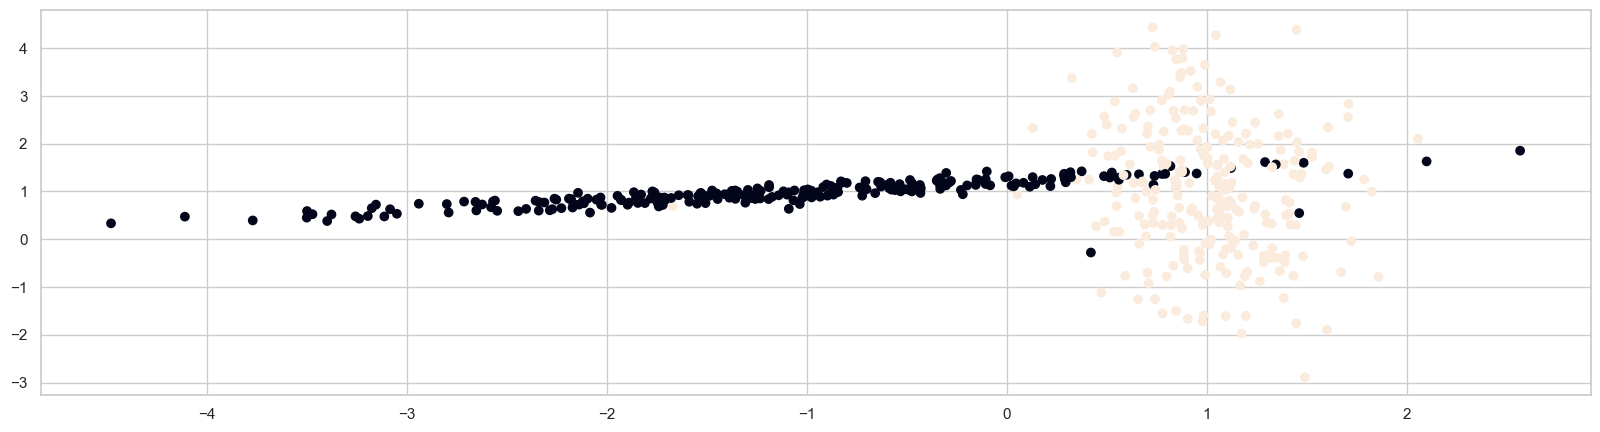

In [26]:
# plotting the data
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

In [27]:
# adding the bias term
ones= np.ones((500, 1))
x_ = np.hstack((ones, x))
x_[:5]

array([[ 1.        , -0.53118927,  1.00157791],
       [ 1.        ,  1.09599812, -0.2058198 ],
       [ 1.        ,  1.3682684 ,  1.86609561],
       [ 1.        ,  0.42996215,  1.81661973],
       [ 1.        , -1.83878374,  0.79832408]])

In [28]:
x_.shape

(500, 3)

In [29]:
# splitting the data into trainset and testset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size = 0.2, random_state = 29)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((400, 3), (100, 3), (400, 1), (100, 1))

In [30]:
# train the model
opt_weight, error_list = gradient_descent(x_train, y_train)

opt_weight

array([[-0.13758771],
       [ 2.04578547],
       [-0.12170367]])

In [31]:
error_list

[0.6931471805599452,
 0.5663899941962187,
 0.4903154400737148,
 0.44114806714982135,
 0.4070295142186095,
 0.38200897344556833,
 0.36287256403648255,
 0.34775298248893166,
 0.3354964762491355,
 0.32535323989384124,
 0.3168152451259344,
 0.3095260946563584,
 0.3032283123237611,
 0.29773116395490457,
 0.2928902699710713,
 0.28859426669800714,
 0.2847558305227376,
 0.2813054863799179,
 0.2781872419452977,
 0.27535544818686936,
 0.272772501681036,
 0.27040713607416467,
 0.26823313321691067,
 0.266228338079337,
 0.26437389679874895,
 0.2626536608335258,
 0.2610537163025352,
 0.259562008747103,
 0.2581680413954149,
 0.2568626305973879]

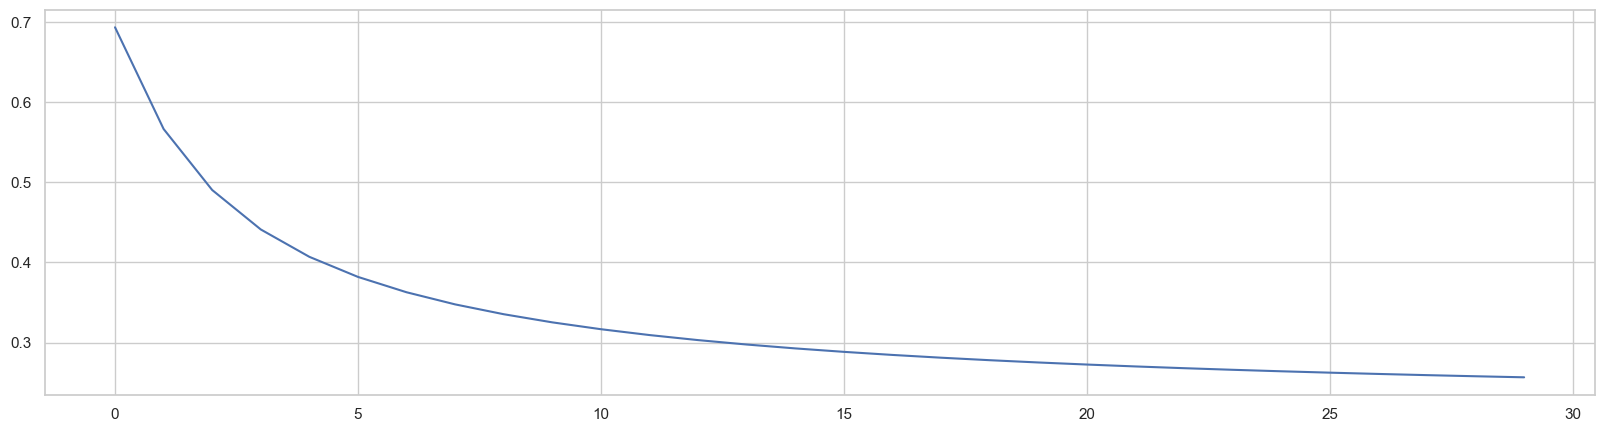

In [32]:
plt.plot(error_list)
plt.show()

[-17.94007714  15.67904891]


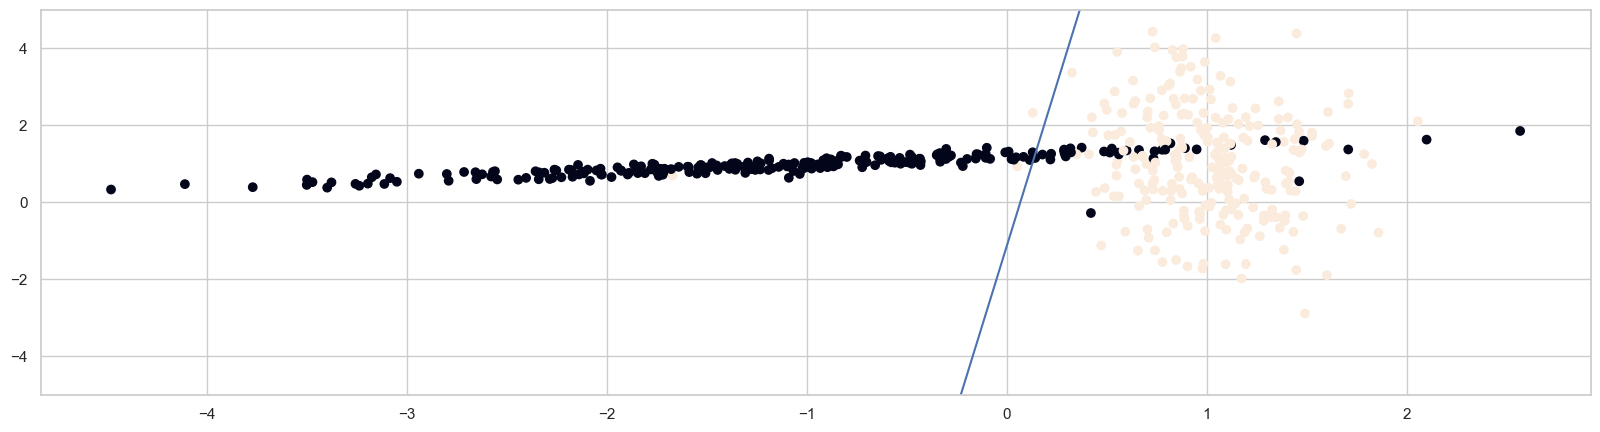

In [33]:
# plotting the Hyperplane that best separates the original data

# generating points to plot the learned line
x1 = np.array([-1,1])
x2 = - (opt_weight[0] + opt_weight[1] * x1) / opt_weight[2]
print(x2)

plt.scatter(x[:, 0], x[:, 1], c = y)
plt.ylim((-5, 5))
plt.plot(x1, x2)
plt.show()

Observe that the hyperplane separates most of the data correctly, at the the same time, there are a few data points which are missclassified.

# Regularization Parameter in Logistic Regression
Regularization is a technique used in machine learning to prevent overfitting by introducing a penalty term to the loss function. This penalty term discourages the model from learning overly complex patterns that might fit the training data too well but perform poorly on unseen data.

The regularization term is typically a hyperparameter, denoted by $c$. A higher $c$ value increases the penalty, leading to a simpler model. A lower $c$ value decreases the penalty, allowing for more complex models.

Here, $c = \frac{1}{\lambda}$.

The loss function for logistic regression, after the regularization parameter is introduced, is mathematically expressed as,

$\text{Loss} = \text{Negative Log-Loss (NLL)} + c * \text{Regularization}$

There are 3 methods in which the regularization parameter can be added to the loss function,
1. Lasso Regression
2. Ridge Regression
3. ElasticNet Regression

### Lasso Regression
Lasso stands for Least Absolute Shrinkage and Selection Operator (LASSO). The Lasso regression uses the L1 norm penalty (sum of absolute values of weights). This has a sparser effect, meaning it can shrink some feature weights all the way to zero, effectively removing those features from the model.

Mathematically, the loss function is expressed as,

$Loss = (\text{NLL}) + c * (\sum_{j = 1}^{d}\mod{W_j})$

### Ridge Regression
Ridge regression is a type of regularization technique commonly used in linear regression to address the problem of multi-collinearity (independent features should not be linear related to each other), and improve model generalizability.

The ridge regression uses the L2 norm penalty (sum of squares of weights). This penalty term is proportional to the sum of the squared coefficients (weights) of the features in the model. This shrinks all feature weights but doesn't necessarily set any to zero.

The penalty term discourages the model from assigning very large weights to any particular feature.

Mathematically, the loss function is expressed as,

$Loss = (\text{NLL}) + c * (\sum_{j = 1}^{d}W_j^2)$

Ridge regression is a good choice when there is a need to reduce the influence of all features but don't necessarily need feature selection. It's generally less prone to overfitting compared to LASSO.

### ElasticNet Regularization
ElasticNet regression is a combination of Lasso and Ridge regression. The loss function is mathematically expressed as,

$Loss = (\text{NLL}) + c * ((\sum_{j = 1}^{d}W_j^2) + (\sum_{j = 1}^{d}\mod{W_j}))$

### Why regularization is important?
- Overfitting: When a model learns the training data too well, it might not generalize well to new, unseen data. This is known as overfitting.
- Underfitting: On the other hand, if a model is too simple, it might not capture the underlying patterns in the data, leading to underfitting.

# Odds and Interpretation of an Event (x) in Terms of Log-Odds
This is a statistical concept used to express the likelihood of an event occurring.

Odds are calculated as the ratio of the probability of an event occurring to the probability of it not occurring (ratio of probability of success to the probability of failure). For example, if the probability of an event is 0.8, the odds of the event are 0.8 / 0.2 = 4. This means that the event is four times more likely to occur than not. Mathematically, $\text{Odds} = \frac{\text{P(Success)}}{\text{P(Failure)}}$.

Log odds is calculated by taking the natural logarithm (log base e) of the odds. This transformation is often used in statistical modeling, especially logistic regression, because it can make the relationship between the predictor variables and the outcome variable more linear. Meaning, it transforms the odds ratio from a non-negative real number to a range of positive and negative values on the real number line.

Log odds is mathematically expressed as,

$\large{\text{Log Odds} = \ln({\text{Odds}}) = \frac{\ln(\text{P(Success)})}{\ln(\text{P(Failure)})}}$

### Interpretation
- A positive log-odds value indicates that the event is more likely to occur than not.
- A negative log-odds value indicates that the event is less likely to occur than not.
- A log-odds value of 0 indicates that the event is equally likely to occur or not.
- The magnitude of the log-odds value reflects the strength of the evidence for or against the event.

# Multi-Class Classification using Logistic Regression
Say that there are 3 classes of fishes, Tuna, Salmon, and Pomfret. A logistic regression model is built for each of the classes. Meaning, 3 models are built in total, model 1 to find if something is Tuna or not, model 2 to find if something is Salmon or not, and model 3 to find if something is Pomfret or not.

Depending upon what model outputs the highest probability score, the fish is categorized into that class. This is called as one versus rest technique (OvR).

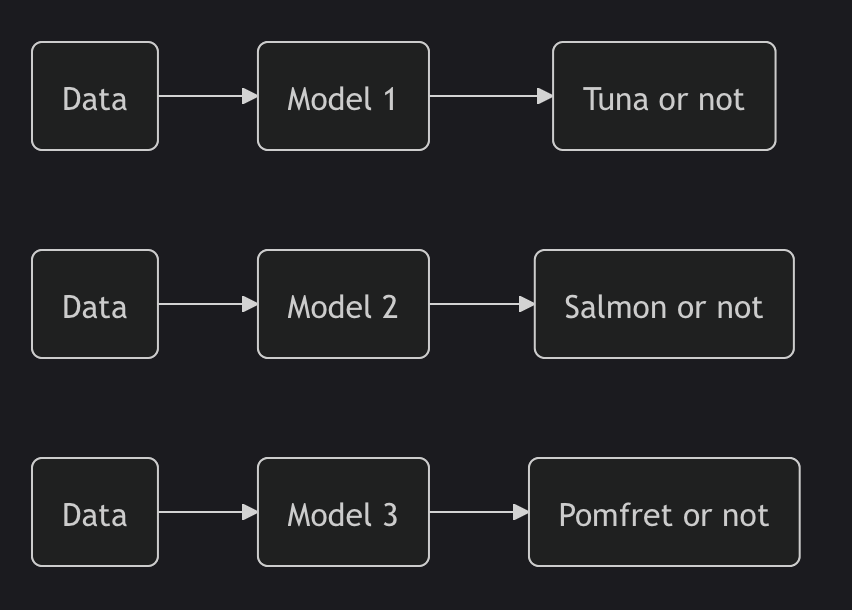

### Code implementation of OvR

In [34]:
# creating artificial data
x, y = make_classification(
    n_samples = 498,
    n_features = 2,
    n_classes = 3,
    n_redundant = 0,
    n_clusters_per_class = 1,
    random_state = 5
)

y = y.reshape(len(y), 1)

In [35]:
# splitting the data into train set, test set and validation set
from sklearn.model_selection import train_test_split

x_tr_cv, x_test, y_tr_cv, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
x_train, x_val, y_train, y_val = train_test_split(x_tr_cv, y_tr_cv, test_size = 0.25,random_state = 4)
x_tr_cv.shape, x_test.shape, x_train.shape, x_val.shape

((398, 2), (100, 2), (298, 2), (100, 2))

In [36]:
model = LogisticRegression(multi_class= "ovr")
model.fit(x_tr_cv, y_tr_cv)

LogisticRegression(multi_class='ovr')

In [37]:
"Train Score", model.score(x_tr_cv, y_tr_cv)

('Train Score', 0.9195979899497487)

In [38]:
"Test Score", model.score(x_test, y_test)

('Test Score', 0.92)

In [39]:
"Val Score", model.score(x_val, y_val)

('Val Score', 0.91)

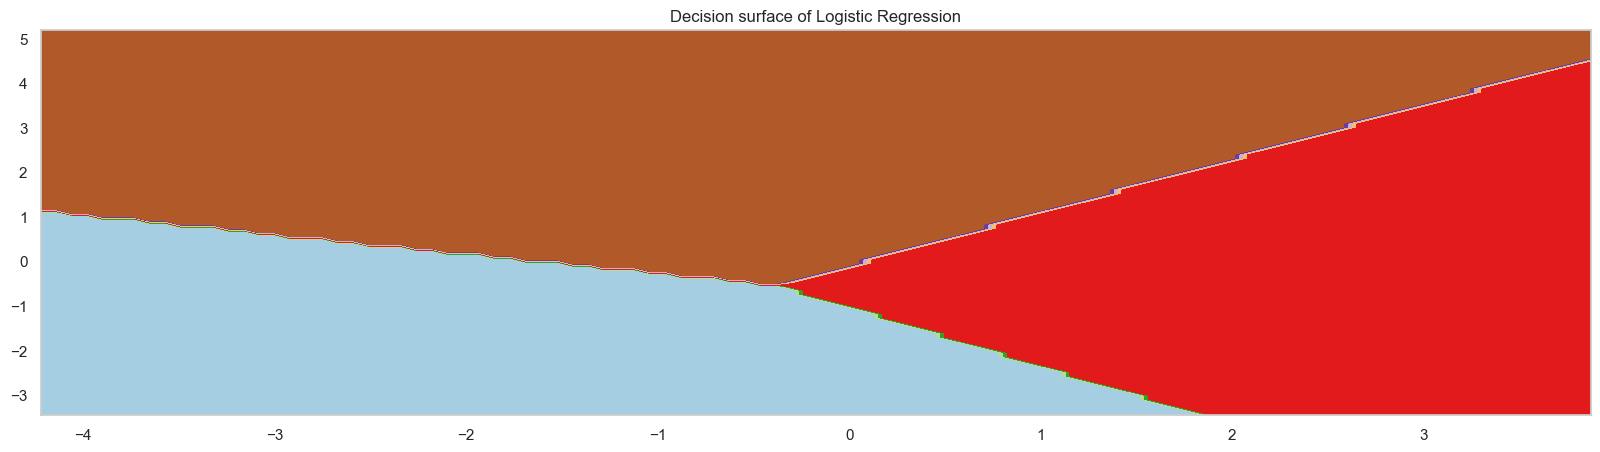

In [40]:
from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, x, response_method = "predict", cmap = plt.cm.Paired, ax = ax)
plt.title("Decision surface of Logistic Regression")
plt.axis("tight")
plt.show()

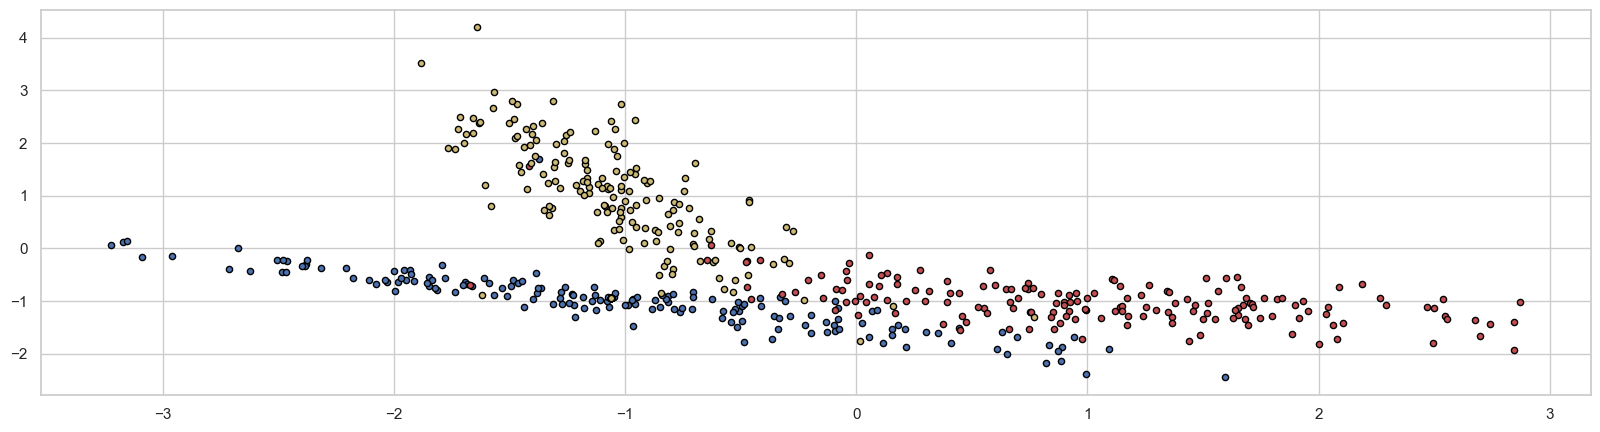

In [41]:
# plotting the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(x[idx, 0], x[idx, 1], c = color, cmap = plt.cm.Paired, edgecolor = "black", s = 20)

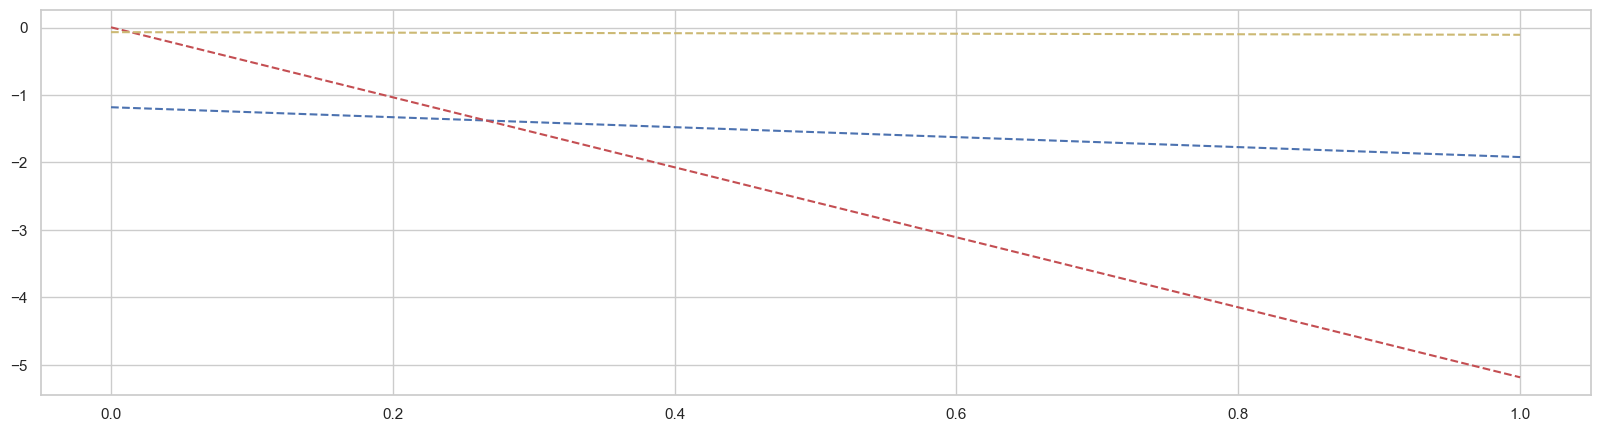

In [42]:
# plotting the OvR classifiers

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls = "--", color = color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

In [43]:
# another example for OvR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset (replace with your data)
iris = load_iris()
x = iris.data  # Features
y = iris.target  # Target variable (class labels)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create the multi-class logistic regression model (One-vs-Rest)
model = LogisticRegression(multi_class = "ovr", solver = "lbfgs")  # Multi-class and solver settings

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Evaluate the model performance (replace with desired metrics)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Predict class probabilities (optional)
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example data point
predicted_proba = model.predict_proba(new_data)
print(f"Predicted probabilities for each class:\n {predicted_proba}")

Accuracy: 0.9667
Predicted probabilities for each class:
 [[8.88167866e-01 1.11829359e-01 2.77506983e-06]]


### Loss function in multi-class classification
The loss function in multi-class logistic regression is typically defined as the cross-entropy loss.

Cross-entropy loss is a measure of the difference between 2 probability distributions. In the context of multi-class logistic regression, one distribution is the true probability distribution of the class labels, and the other is the predicted probability distribution from the model.

The mathematical expression of cross-entropy is,

$H(p, q) = - \sum_{i = 1}^n p_i * \log(q_i)$

Where,
- $n$ = number of classes.
- $p_i$ = true probability of the ith class.
- $q_i$ = predicted probability of the ith class.

Interpretation,
- The cross-entropy loss is minimized when the predicted probability distribution is as close as possible to the true probability distribution.
- If the model predicts the correct class with high probability, the loss will be low.
- If the model predicts the wrong class with high probability, the loss will be high.

# Confusion Matrix
Confusion matrix is a visualization tool used to evaluate the performance of a classification model, including logistic regression. It provides a clear breakdown of how the model performed on the testing data in terms of correctly and incorrectly classified data points for each class.

### Structure

| | Predicted Ham (Class 0) | Predicted Spam (Class 1) |
| :-: | :-: | :-: |
| Actual Ham (Class 0) | TN | FP |
| Actual Spam (Class 1) | FN | TP |

### Accuracy
Accuracy can now be expressed as,

$\text{Accuracy} = \frac{TP + TN}{TN + FP + FN + TP}$

In [44]:
# reading the original dataset
df = pd.read_csv("spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [45]:
# 1st email
df["text"][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [46]:
# reading the cleaned dataset
df = pd.read_csv("spam_final.csv")
df.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [47]:
df["label_num"].value_counts()

label_num
0    3672
1    1499
Name: count, dtype: int64

In [48]:
# there is an imbalance in the dataset
# percentage share of each class in the dataset
df["label_num"].value_counts(normalize = True)

label_num
0    0.710114
1    0.289886
Name: proportion, dtype: float64

In [49]:
# alternatively
df["label_num"].value_counts()/ len(df["label_num"]) * 100

label_num
0    71.01141
1    28.98859
Name: count, dtype: float64

<Axes: xlabel='label_num'>

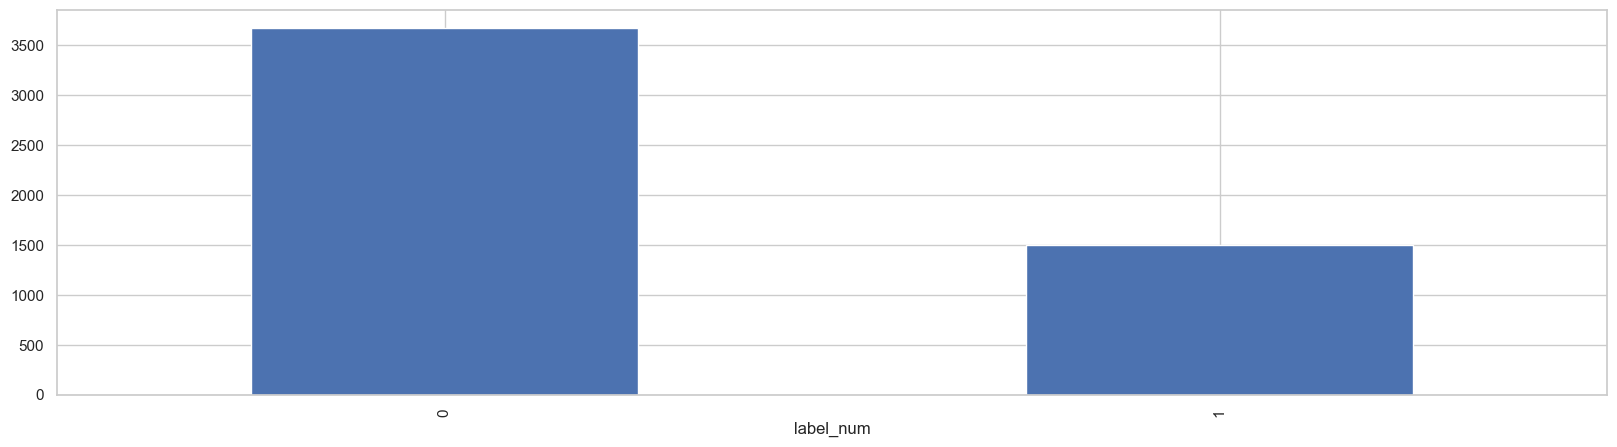

In [50]:
# plotting a bar plot
# plotting
df["label_num"].value_counts().plot(kind = "bar")

In [51]:
# separating features and labels
x = df.drop(columns = ["label_num"])
y = df["label_num"]

In [52]:
# splitting the data into train set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 29)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3878, 15), (1293, 15), (3878,), (1293,))

In [53]:
y_train.value_counts()

label_num
0    2753
1    1125
Name: count, dtype: int64

In [54]:
y_train.value_counts(normalize = True)

label_num
0    0.709902
1    0.290098
Name: proportion, dtype: float64

In [55]:
y_test.value_counts(normalize = True)

label_num
0    0.71075
1    0.28925
Name: proportion, dtype: float64

In [56]:
# building the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [57]:
model.fit(x_train, y_train)

LogisticRegression()

In [58]:
model.score(x_train, y_train)

0.9311500773594636

In [59]:
model.score(x_test, y_test)

0.9234338747099768

In [60]:
# computing the predictions
y_test_pred = model.predict(x_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
from sklearn.metrics import confusion_matrix

cmp = confusion_matrix(y_test, y_test_pred)
cmp

array([[839,  80],
       [ 19, 355]])

<Axes: >

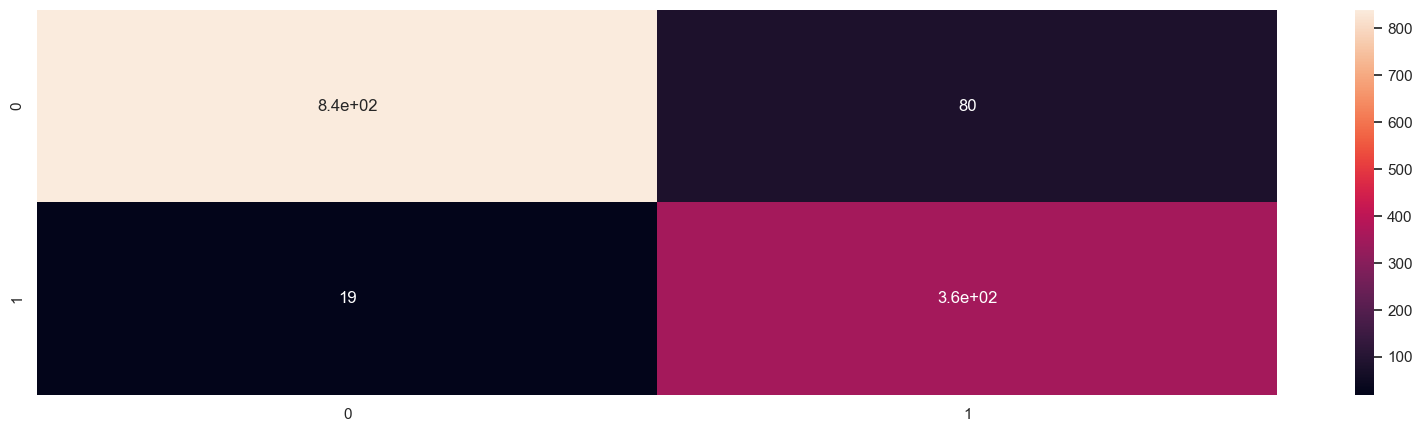

In [62]:
# confusion matrix can be visualized by plotting a heatmap
sns.heatmap(cmp, annot = True)

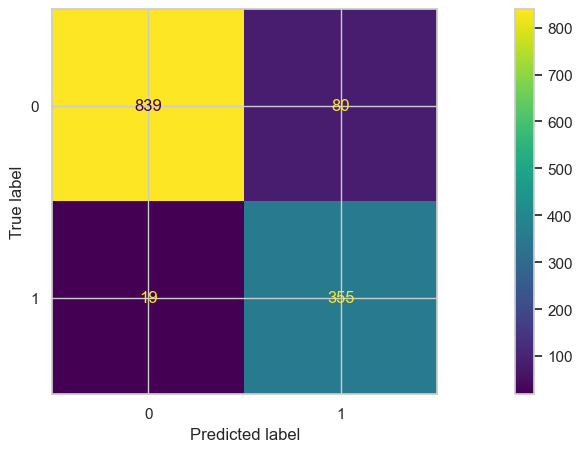

In [63]:
# it can also be visualized using an in-built method
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(cmp)
disp.plot()

# Precision and Recall

### Precision
Precision measures the proportion of predicted positives that are actually correct. Higher precision indicates that the model is better at identifying the positive class without making many mistakes (i.e., predicting positive when something is negative).

Precision attempts to answer the question, "What proportion of positive identifications are actually correct?".

Precision is calculated as, $\text{Precision} = \frac{TP}{TP + FP}$.

The range of precision is between (0, 1)

### Recall
Recall, also known as Sensitivity or True Positive Rate, measures the proportion of actual positive data points that the model correctly identifies. Higher recall indicates that the model is better at capturing all the relevant positive cases, and avoids missing them.

Recall attempts to answer the question, "What proportion of actual positives are identified correctly?".

Recall is calculated as, $\text{Recall} = \frac{TP}{TP + FN}$.

The range of recall is between (0, 1).

In a nutshell, Precision measures the proportion of true positives out of all the identified positives, and recall measures the proportion of identified positives out of all the true positives.

Opt for high precision, when the focus is just on capturing the positives accurately. Opt for high recall when the focus is on avoiding false negatives.

In [64]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_test_pred)

0.8160919540229885

In [65]:
recall_score(y_test, y_test_pred)

0.9491978609625669

# F1 Score
There may be cases where recall is more important than precision, and there may be cases where precision is more important than recall. But there may also be cases where both of them are important. For example, in credit card transactions, where it is important to detect if a transaction is fradulent or not. If there is high recall, most of the fradulent transactions will be caught, as a result, the precision becomes less. In this scenario, a lot of valid transactions may be classified as fradulent and this will lead to very bad customer experience. Hence, while recall is important without a doubt, ignoring precision is also an expensive choice.

Precision and recall are valuable metrics individually, but they can provide conflicting information. A model might have high precision but low recall , or vice versa.

F1 score considers both precision, and recall while evaluating the model's performance. It is a harmonic mean of precision and recall, combining both metrics into a single score between 0 and 1. F1 score is defined as, 

$\large{\text{F1-score} = \frac{2 * (\text{Precision} * \text{Recall})}{(\text{Precision} + \text{Recall})}}$.

A higher F1-score (closer to 1) indicates that the model is performing well on both precision and recall. An F1-score of 0.5 represents a model with equal precision and recall, while a score of 0 indicates poor performance in both aspects.

In [66]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred)

0.8776266996291718

# Sensitivity
Sensitivity also known as recall or true positive rate (TPR), measures the proportion of actual positives that the model correctly identifies.

$\large{\text{Sensitivity} = \frac{TP}{TP + FN}}$

A high sensitivity value (closer to 1) indicates that the model is good at catching most of the actual positive cases. A low sensitivity value indicates that the model misses a significant portion of the positives, leading to false negative (FN).

# Specificity
Specificity measures the proportion of actual negatives that the model correctly identified.

$\large{\text{Specificity} = \frac{TN}{TN + FP}}$

A high specificity value (closer to 1) indicates that the model is good at correctly identifying true negatives, avoiding false positives (FP). A low specificity value indicates that the model incorrectly labels some negative cases as positive.

# False Negative Rate (FNR)
FNR, also know as "miss rate", measures the proportion of actual positive cases that the model incorrectly classified as negative.

$\large{\text{FNR} = \frac{FN}{TP + FN}}$.

A high FNR value (closer to 1) indicates that the model is missing a significant portion of the actual positives, leading to many false negatives (FN). A low FNR value (closer to 0) indicates that the model is good at identifying most of the positive cases.

A high FNR is indicative of low recall.

# False Positive Rate (FPR)
FPR measures the proportion of actual negative cases that the model incorrectly classified as positive.

$\large{\text{FPR} = \frac{FP}{TN + FP}}$.

A high FPR value (closer to 1) indicates that the model is making many false positives (FP), classifying negative cases as positive. A low FPR value (closer to 0) indicates that the model is good at correctly identifying true negatives (TN).

A high FPR is indicative of low precision.

# Summary of all the Metrics
- Precision measures the proportion of actual positives out of all the values that have been identified as positive. $\text{Precision} = \frac{TP}{TP + FP}$.
- Recall measures the proportion of identified positives out of all the values that are actually positives. $\text{Recall} = \frac{TP}{TP + FN}$.
- F1 score is the harmonic mean of precision and recall. A high F1 score (close to 1) indicates that the model is performing well on Precision and Recall. An F1 score of 0.5 indicates that the model is equal at precision and recall. A low F1 score (close to 0) indicates that the model is performing poorly at Precision and Recall. $\text{F1-score} = \frac{2 * (\text{Precision} * \text{Recall})}{(\text{Precision} + \text{Recall})}$.
- Sensitivity is also called as Recall or True Positive Rate (TPR). It measures the proportion of identified positives out of all the values that are actual positive. $\text{Sensitivity} = \frac{TP}{TP + FN}$.
- Specificity measures the proportion of identified negatives out of all the values that are actually negatives. $\text{Specificity} = \frac{TN}{TN + FP}$
- False Negative Rate (FNR) measures the proportion of actual positives that have been incorrectly identified as negative. A high FNR is indicative of low Recall. $FNR = \frac{FN}{TP + FN}$.
- False Positive Rate (FPR) measures the proportion of actual negatives that have been incorrectly identified as positive. A high FPR is indicative of low Precision. $FPR = \frac{FP}{TN + FP}$.

# Relationship between Threshold, F1 Score and Model Performance
Changing the threshold in a logistic regression model can impact the F1 score. A lower threshold (more sensitive) might increase recall (catching more positives) but decrease precision (more false positives). The converse happens with a higher threshold (more specific).

An F1 score of 0.90 at a threshold of 0.6 doesn't necessarily indicate a "better" model compared to 0.88 at 0.5. It simply suggests a trade-off between precision and recall at different thresholds for the same model.

The concept of ROC curve, and PR curve help in providing a threshold independent view of the model's performance.

Comparing models solely based on F1 score at specific thresholds can be misleading. ROC and PR curves offer a more robust comparison. Analyze the overall shape and AUC of the ROC curves for both models,
- A consistently higher AUC for one model indicates a generally better performance across thresholds.
- Similarly, compare the PR curves. A model consistently closer to the top-left corner might be preferable for the task.

# Receiver Operating Characteristics Curve (ROC Curve)
ROC curves are a graphical tool used in machine learning to evaluate the performance of binary classification models. It illustrates the model's ability to distinguish between positive and negative classes at various classification thresholds. 

They plot the true positive rate (TPR) on the y-axis, against the false positive rate (FPR) on the x-axis. A model with a higher area under ROC (AU-ROC) curve generally performs better accross all thresholds.

X-axis (FPR): represents the proportion of negative cases incorrectly classified as positive by the model.

Y-axis (TPR): represents the proportion of positive cases correctly classified as positive by the model.

A perfect classifier would have an ROC curve that goes straight up from the bottom left corner (0 FPR, 0 TPR) to the top left corner (0 FPR, 1 TPR) and then horizontally across the top (1 TPR for all remaining thresholds). This indicates that the model correctly identifies all positive cases without any false positives.

The plot of AU-ROC looks like,

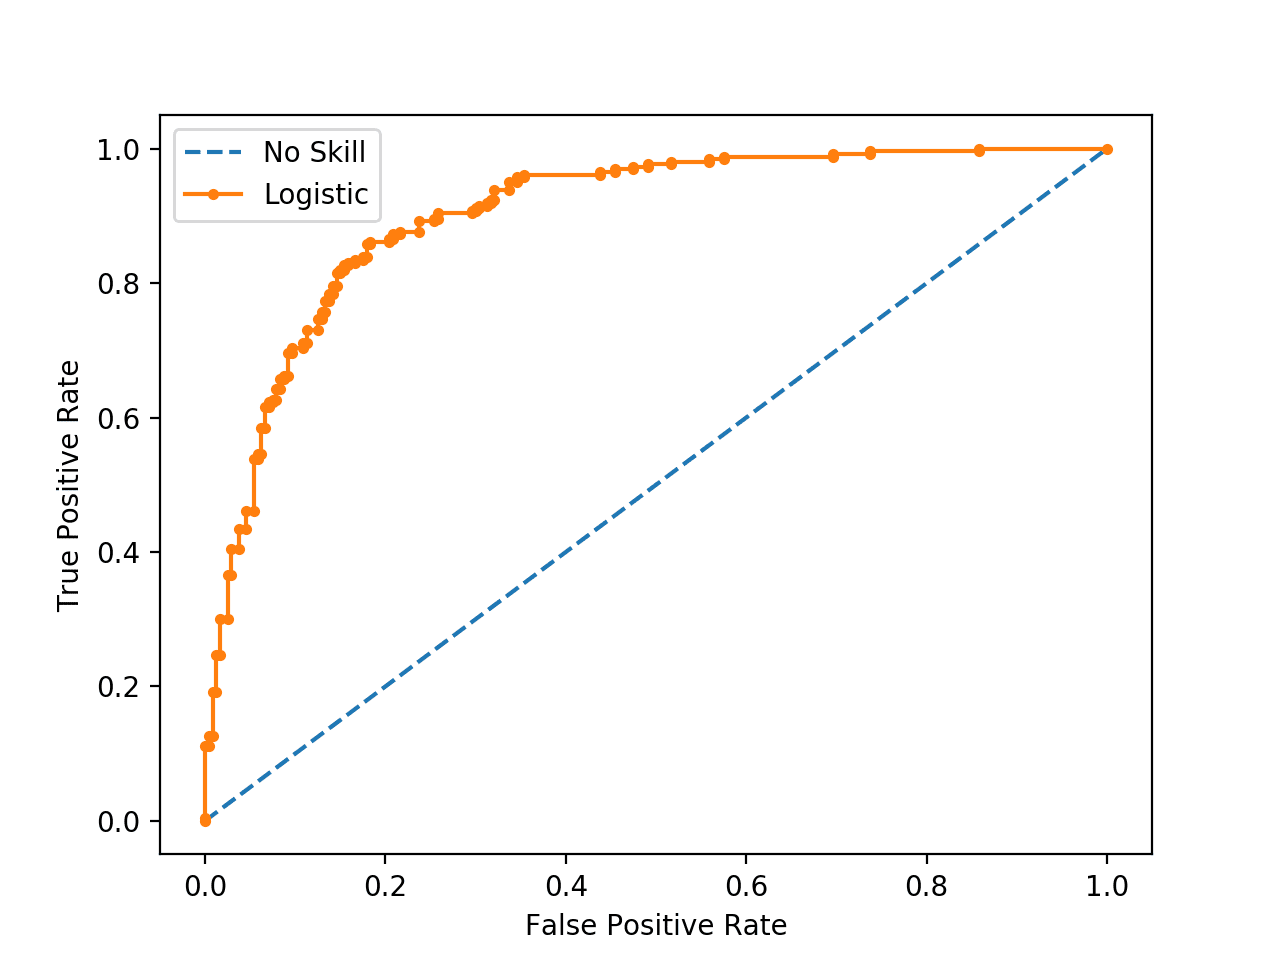

### Interpreting the AU-ROC curve
- Diagonal Line: A diagonal line from (0, 0) to (1, 1) represents a random classifier.
- Closer to the Top-Left Corner: A curve closer to the top-left corner indicates better performance. This means the model is able to correctly classify more positive instances while minimizing false positives.
- Area Under the Curve (AUC): The area under the ROC curve (AUC) provides a quantitative measure of the model's performance. An AUC of 1 indicates perfect classification, while an AUC of 0.5 indicates random classification.

ROC curve can be misleading in cases where there is severe class imbalance.

Further reading: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [67]:
from sklearn.metrics import roc_curve

# prediction
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
# prediction probabilities
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[0.94258501, 0.05741499],
       [0.99168398, 0.00831602],
       [0.9966155 , 0.0033845 ],
       ...,
       [0.73694935, 0.26305065],
       [0.98270076, 0.01729924],
       [0.94248072, 0.05751928]])

In [69]:
y_pred_proba = [i[1] for i in y_pred_proba]
y_pred_proba

[0.05741499396670608,
 0.008316017261988605,
 0.00338450437432912,
 0.009665051002216433,
 0.04487346397819915,
 0.007840337100754645,
 0.7120225093886253,
 0.05994713374470183,
 0.005568368155487065,
 0.4619455307069039,
 0.26605257443736474,
 0.4380283290323253,
 0.07490765968427805,
 0.022937386711674935,
 0.6402299178739211,
 0.08779528469926452,
 0.008949397180948188,
 0.6612084097798666,
 0.20873471904586316,
 0.38929566565551604,
 0.2556862847823154,
 0.1357915485120311,
 0.874081806728022,
 0.30589336120598964,
 0.05447651200928827,
 0.021425390230926537,
 0.6681706083785468,
 0.20109178645503462,
 0.08873661092121664,
 0.04705802848081862,
 0.3516526440606666,
 0.2138885977736528,
 0.05115465858080994,
 0.2647093344395593,
 0.9348385107748602,
 0.02182906280034207,
 0.007679707946753171,
 0.006693258724402012,
 0.6772030207239388,
 0.020055482744657,
 0.06626915279687436,
 0.7638706932488446,
 0.49632182174231865,
 0.3793305017012592,
 0.57056647467195,
 0.23151607834932078,
 

In [70]:
roc_curve(y_pred, y_pred_proba)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0967366 , 0.0990676 , 0.17715618, 0.17948718,
        0.25990676, 0.26223776, 0.44405594, 0.44638695, 0.44871795,
        0.45104895, 0.5       , 0.502331  , 0.54079254, 0.54312354,
        0.6013986 , 0.6037296 , 0.63053613, 0.63636364, 0.64219114,
        0.64685315, 0.65268065, 0.65501166, 0.70512821, 0.70745921,
        0.72027972, 0.72261072, 0.81585082, 0.81818182, 0.94172494,
        0.94405594, 0.96037296, 0.96270396, 1.        ]),
 array([0.        , 0.00229885, 0.45517241, 0.45977011, 0.51954023,
        0.52413793, 0.68275862, 0.68735632, 0.85517241, 0.86436782,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.

In [71]:
fpr, tpr, thresholds = roc_curve(y_pred, y_pred_proba)

In [72]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0967366 , 0.0990676 , 0.17715618, 0.17948718,
       0.25990676, 0.26223776, 0.44405594, 0.44638695, 0.44871795,
       0.45104895, 0.5       , 0.502331  , 0.54079254, 0.54312354,
       0.6013986 , 0.6037296 , 0.63053613, 0.63636364, 0.64219114,
       0.64685315, 0.65268065, 0.65501166, 0.70512821, 0.70745921,
       0.72027972, 0.72261072, 0.81585082, 0.81818182, 0.94172494,
       0.94405594, 0.96037296, 0.96270396, 1.        ])

In [73]:
tpr

array([0.        , 0.00229885, 0.45517241, 0.45977011, 0.51954023,
       0.52413793, 0.68275862, 0.68735632, 0.85517241, 0.86436782,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [74]:
thresholds

array([           inf, 9.77228530e-01, 6.68192836e-01, 6.68170608e-01,
       6.46633119e-01, 6.45504263e-01, 5.99368624e-01, 5.98456054e-01,
       5.56255125e-01, 5.56240580e-01, 5.00216381e-01, 3.36918450e-01,
       3.35564601e-01, 2.19879068e-01, 2.18179117e-01, 1.28668676e-01,
       1.27907675e-01, 4.86487989e-02, 4.85144029e-02, 4.83726700e-02,
       4.78307546e-02, 3.93527102e-02, 3.92423657e-02, 3.41756005e-02,
       3.40727129e-02, 2.50494433e-02, 2.49027401e-02, 2.20710734e-02,
       2.19312885e-02, 2.15367873e-02, 2.14253902e-02, 2.04910672e-02,
       2.00554827e-02, 1.43054617e-02, 1.42039016e-02, 1.29425939e-02,
       1.28059061e-02, 8.15049757e-03, 8.06549594e-03, 2.45322904e-03,
       2.33320752e-03, 1.91161270e-03, 1.90930965e-03, 4.76663450e-04])

In [75]:
thresholds[0]

inf

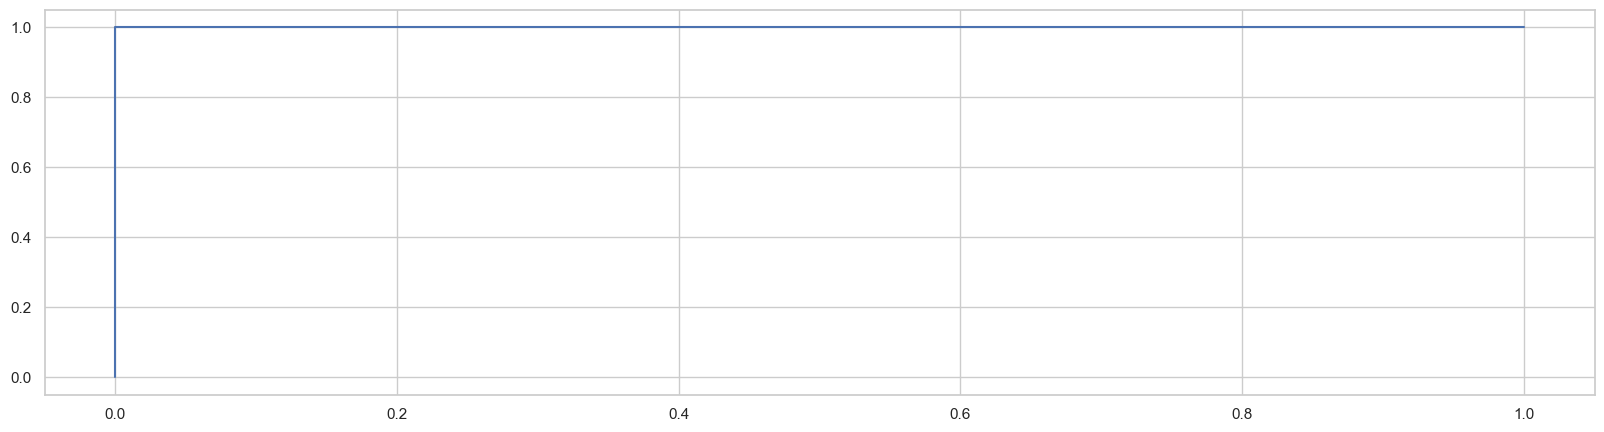

In [76]:
plt.plot(fpr, tpr)

# Precision-Recall (PR) Curve
PR curves are another tool used in machine learning to evaluate the performance of binary classification models, espically when dealing with imbalanced datasets. They plot precision against recall. Unlike ROC curves, PR curves focus on the trade-off between precision and recall at various classification thresholds.

X-axis (Precision): Represents the proportion of predicted positive cases that are truly positive (avoiding false positives).

Y-axis (Recall): Represents the proportion of actual positive cases that are correctly identified by the model (avoiding false negatives).

A perfect classifier would have a PR curve that starts at the top-left corner (1 precision, 1 recall) and goes diagonally down to the bottom right corner (0 precision, 1 recall). This indicates the model correctly identifies all positive cases without any false positives.

The plot of PR curve looks like,

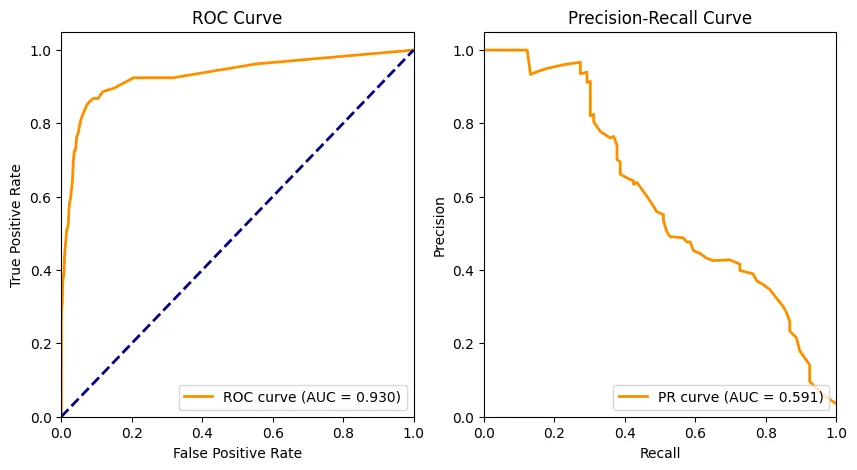

Like ROC curves, PR curves can be misleading in cases of severe class imbalance.

Further reading: https://juandelacalle.medium.com/how-and-why-i-switched-from-the-roc-curve-to-the-precision-recall-curve-to-analyze-my-imbalanced-6171da91c6b8

In [77]:
from sklearn.metrics import precision_recall_curve

pr, re, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [78]:
pr

array([0.28924981, 0.28947368, 0.28969791, ..., 1.        , 1.        ,
       1.        ])

In [79]:
re

array([1.        , 1.        , 1.        , ..., 0.00534759, 0.0026738 ,
       0.        ])

In [80]:
thresholds

array([4.76663450e-04, 6.03278945e-04, 6.31788066e-04, ...,
       9.64208251e-01, 9.74196913e-01, 9.77228530e-01])

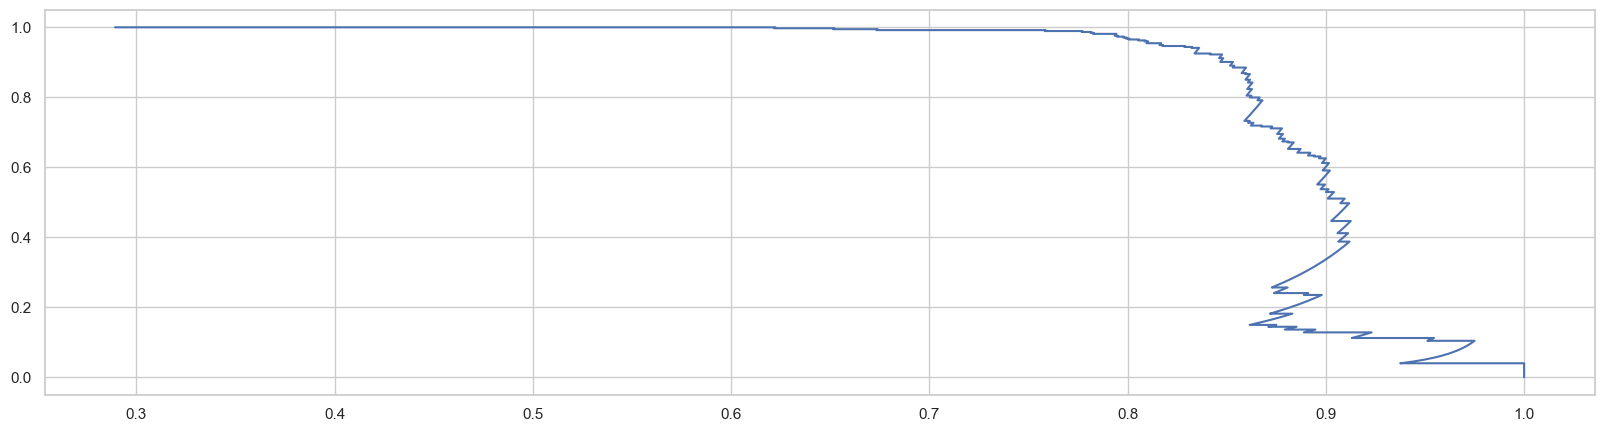

In [81]:
plt.plot(pr, re)

In [82]:
# area under the curve can be computed as
from sklearn.metrics import auc

# area under PR curve
auc(re, pr)

0.8885170027993956

In [83]:
# area under ROC curve
auc(fpr, tpr)

1.0

# Classification Report
A classification report is a summary of a classification model's performance on a dataset. It provides insights into how well the model classified data points belonging to different classes.

In [84]:
from sklearn.metrics import classification_report

print("Test Report: ", classification_report(y_test, y_test_pred))

Test Report:                precision    recall  f1-score   support

           0       0.98      0.91      0.94       919
           1       0.82      0.95      0.88       374

    accuracy                           0.92      1293
   macro avg       0.90      0.93      0.91      1293
weighted avg       0.93      0.92      0.93      1293



### Components of classification report
- Classes: This section lists the different class labels present in your data.
- Precision: This metric represents the proportion of predicted positive cases that were truly positive. It answers the question: "Out of all the data points the model labeled as positive, how many were actually positive?”
- Recall (Sensitivity): This metric represents the proportion of actual positive cases that were correctly identified by the model. It answers the question: "Out of all the actual positive cases in the data, how many did the model identify correctly?”
- F1 Score: This metric is the harmonic mean of precision and recall, combining both metrics into a single score. A high F1 Score indicates a good balance between precision and recall.
- Support: This metric represents the total number of data points belonging to each class in the dataset.

### Interpretation:
- A good classification report will have high precision, recall, and F1-score values for all classes, ideally close to 1. However, in some cases, there might be trade-offs between these metrics.
- A low precision value for a class might indicate the model is predicting too many false positives for that class.
- A low recall value for a class might indicate the model is missing too many true positives for that class.

# Data Imbalance
Dataset is said to be imbalanced when data points of one class are higher in number than other class. Data imbalance does not just occur in binary classes, in-fact data imbalance is even more prominent in multi-class.

### Handling data imbalance
1. Oversampling techniques: These techniques increase the number of data points in the minority class.
    - Random Oversampling (ROS): Duplicates data points from the minority class randomly.
    - SMOTE (Synthetic Minority Oversampling Technique): Creates synthetic data points for the minority class by interpolating between existing minority class data points.
2. Undersampling Techniques: These techniques decrease the number of data points in the majority class.
    - Random Undersampling (RUS): Randomly removes data points from the majority class.
    - NearMiss (Nearest Neighbors): Removes majority class data points that are far away from minority class data points in feature space.
3. Cost-Sensitive Learning/ Setting Class Weights: This approach assigns different costs to misclassifications of different classes. The model is trained to minimize the overall cost.

### Impact of data balancing in the model's performance, or the model in general
- Positive impacts
    - Improved Model Performance: In imbalanced datasets, where one class (majority class) has significantly more data points than the other (minority class), models tend to be biased towards the majority class. Balancing the data helps the model learn the patterns of the minority class more effectively, leading to improved performance metrics like accuracy, precision, recall, and F1-score for the minority class.
    - Reduced Bias: Data balancing helps mitigate the bias towards the majority class, leading to a fairer representation of both classes in the model's predictions. This is crucial for tasks where accurate identification of the minority class is important.
    - Enhanced Generalization: Balancing techniques can sometimes lead to a model that generalizes better to unseen data, especially when dealing with imbalanced real-world scenarios.

- Negative impacts
    - Loss of Information: Oversampling techniques (duplicating minority class data) might lead to overfitting if not done carefully. The model might memorize noise or irrelevant patterns present in the duplicated data.
    - Computational Cost: Oversampling data can increase training time and memory requirements, especially for large datasets.
    - In some cases, oversampling techniques can create artificial patterns in the minority class data, which might not reflect the real-world distribution.
    - Limited Effectiveness in Extreme Imbalance: Balancing techniques might not be very effective in cases of extreme class imbalance, where the minority class has very few data points.

In [85]:
# ## Handling Data Imbalance using Random Oversampling
# from imblearn.over_sampling import RandomOverSampler
# # Sample data (replace with yours)
# X = None  # Features
# y = None  # Target labels (0 for majority, 1 for minority)
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X, y)

# ## Handling Data Imbalance using SMOTE:
# from imblearn.over_sampling import SMOTE
# # Sample data (replace with yours)
# X = None  # Features
# y = None  # Target labels (0 for majority, 1 for minority)
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# ## Handling Data Imbalance using Random Undersampling:
# from imblearn.under_sampling import RandomUnderSampler
# # Sample data (replace with yours)
# X = None  # Features
# y = None  # Target labels (0 for majority, 1 for minority)
# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X, y)

# ## Handling Data Imbalance using NearMiss:
# from imblearn.under_sampling import NearMiss
# # Sample data (replace with yours)
# X = None  # Features
# y = None  # Target labels (0 for majority, 1 for minority)
# nm = NearMiss(version=3)  # Different versions available
# X_resampled, y_resampled = nm.fit_resample(X, y)

# ## Handling Data Imbalance using Cost Sensitive Learning:
# from sklearn.linear_model import LogisticRegression
# # Sample data (replace with yours)
# X = None  # Features
# y = None  # Target labels (0 for majority, 1 for minority)
# # Assign higher cost to misclassifying the minority class
# class_weight = {0: 1, 1: 10}  # Adjust weights as needed
# model = LogisticRegression(class_weight=class_weight)
# model.fit(X, y)

# Hyperparameters in Logistic Regression
- Solver: This hyperparameter determines the algorithm used to optimize the weights and bias of the model. Common choices include "lbfgs" (default), "liblinear" (faster for smaller datasets), and "newton-cg" (faster for some problems).
- Penalty: This controls the type of regularization used to prevent overfitting. Logistic regression offers two options: "l1" (LASSO) for feature selection and "l2" (Ridge) to reduce weight magnitudes. The hyperparameter associated with penalty is usually C which controls the strength of the regularization.
- Max Iterations: Defines the maximum number of times the optimization algorithm will iterate before stopping. This can be crucial to avoid getting stuck in local minima.
- Tolerance:  This sets the minimum improvement threshold for the objective function during optimization. The algorithm stops if the change in the objective function is less than the tolerance value for a specific number of iterations.
- Other Hyperparameters:  Logistic regression also offers options for setting an initial guess for weights (random_state), handling class imbalance (class_weight), and controlling logging verbosity (verbose).

# Metrics to Evaluate Logistic Regression
### Classification Accuracy
This is the most basic metric, simply calculating the percentage of predictions that the model gets correct. It's easy to understand but can be misleading in certain situations, especially with imbalanced class distributions.

### Confusion Matrix
This is a table that shows the breakdown of how many data points were correctly classified (True Positives, True Negatives) and how many were incorrectly classified (False Positives, False Negatives). It provides a more detailed picture of the model's performance beyond just accuracy.

### Precision and Recall
- Precision: Measures the proportion of positive predictions that were actually correct (True Positives / (True Positives + False Positives)). It reflects how good the model is at identifying actual positives.
- Recall: Measures the proportion of actual positives that were identified by the model (True Positives / (True Positives + False Negatives)). It reflects how good the model is at capturing all the relevant positive cases.

### F1-Score
This is a harmonic mean of precision and recall, combining both metrics into a single score. It provides a balance between the two and is useful when both precision and recall are important.

### ROC AUC (Area Under the ROC Curve)
The Receiver Operating Characteristic (ROC) curve is a visualization tool that plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds. The AUC (Area Under the Curve) summarizes the ROC curve, representing the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance. A higher AUC indicates better discrimination between classes.

### Log Loss
This is the loss function minimized during training in logistic regression. It measures the difference between the predicted probabilities and the actual class labels. Lower log loss indicates better model fit.

# Bias-Variance Trade-Off in Logistic Regression
- Low bias, high variance: A less complex model with fewer features or weak regularization might have low bias (fits the underlying trend well) but high variance (sensitive to training data details). This can lead to good performance on the training data but poor performance on unseen data.
- High bias, low variance: A more complex model with many features or strong regularization might have low variance (less sensitive to training data) but high bias (might miss the underlying trend). This can lead to poor performance on both training and unseen data, as the model consistently misses the mark.

The goal in logistic regression is to find a sweet spot between these two extremes. You want a model that captures the underlying relationship between features and the target variable (low bias) but doesn't become overly sensitive to the specific training data (low variance).

Here are some ways to manage the bias-variance trade-off in logistic regression,
1. Feature Selection: Choosing relevant features can help reduce bias by focusing on the information that truly matters for prediction. Techniques like L1 regularization (LASSO) in logistic regression can automatically select features by shrinking some weight coefficients to zero.
2. Regularization: Techniques like L1 or L2 regularization penalize large model weights, effectively preventing the model from becoming overly complex and capturing noise in the training data. This helps to reduce variance.
3. Data Augmentation: Increasing the size and diversity of your training data can help reduce variance. Techniques like data augmentation (artificially creating new data points) can be used to improve the model's ability to generalize to unseen data.

# Underfitting and Overfitting in Linear Regression

### Underfitting
- Scenario: The logistic regression model is too simple and fails to capture the underlying relationships between the features and the target variable or the label (typically binary in logistic regression).
- Symptoms:
    - Low accuracy on both the training and testing datasets.
    - The model might not learn the true decision boundary effectively, leading to misclassifications.
    - Coefficients (weights) associated with features might be close to zero, indicating they have little impact on the predictions.
- Causes:
    - Not enough features: The model might lack the necessary features to represent the complexity of the data.
    - High regularization: Regularization techniques can prevent overfitting but if too strong, they might also restrict the model's ability to learn the true relationships.

### Overfitting
- Scenario: The logistic regression model becomes too complex and memorizes the training data too well, failing to generalize to unseen data.
- Symptoms:
    - High accuracy on the training data but significantly lower accuracy on the testing dataset.
    - The model might perform well on specific patterns present only in the training data, but struggle with new data with slightly different patterns.
    - Coefficients associated with irrelevant features might have high values, suggesting the model is fitting to noise in the training data.
- Causes:
    - Too many features: Including irrelevant or redundant features can lead the model to fit to noise in the data.
    - Under-regularization: Regularization is crucial for preventing overfitting, but if it's weak, the model can become overly complex.

# Impact of Outliers in Logistic Regression

### Impact
- Distort Model Estimates: Outliers, being data points far from the main cluster, can significantly influence the estimated coefficients of the logistic regression model. This can lead to,
    1. Incorrect Signs: The signs of the coefficients might be flipped, indicating an opposite relationship between the feature and the target variable compared to the actual trend in the majority of the data.
    2. Misleading Magnitudes: The magnitude of the coefficients might be inflated or deflated, making it difficult to assess the true strength of the relationships between features and the probability of the target event.
- Reduce Model Convergence: In severe cases, outliers can make it difficult for the logistic regression algorithm to converge during the optimization process. This can lead to unreliable coefficient estimates and potentially halt the training altogether.
- Decrease Model Generalizability:  A model overly influenced by outliers might not generalize well to unseen data. The model might capture specific patterns related to the outliers that don't hold true for the broader population.

### Mitigation
- Outlier Detection and Removal: Consider identifying and removing outliers before fitting the model. However, use caution as valid but extreme data points can be informative. Removing them might lead to information loss.
- Robust Logistic Regression Techniques: Explore robust logistic regression methods less susceptible to outliers. These methods use different loss functions that downweight the influence of outliers in the model fitting process.
- Data Transformation: Techniques like winsorization or capping outliers to a certain threshold can be used to reduce their impact on the model without entirely removing them.
- Careful Interpretation of Coefficients:  Be mindful of the potential influence of outliers when interpreting the coefficients of the logistic regression model. Consider using visualizations or diagnostics to assess the impact of outliers.

# Impact of Data Imbalance on Logistic Regression

### Challenges with Imbalanced Data
- Biased Model: Logistic regression minimizes the overall loss function during training. When one class dominates, the model prioritizes learning its patterns, leading to a bias towards the majority class. This means the model performs well on the majority class but poorly on the minority class, failing to capture its unique characteristics.
- Inaccurate Probability Estimates: Logistic regression outputs probability scores between 0 and 1 for belonging to the positive class. In an imbalanced scenario, the model tends to predict most data points as belonging to the majority class, resulting in inaccurate probability estimates for the minority class.
- Evaluation Metric Issues:  Metrics like accuracy become misleading when dealing with imbalanced data. A high accuracy might simply reflect the model's ability to classify the majority class well, neglecting its performance on the minority class.

### Impact on Predictions
- Poor Minority Class Classification:  The model struggles to identify patterns in the minority class data due to its limited representation. This leads to a higher number of false negatives (failing to identify actual positive cases) for the minority class.
- Reduced Generalizability:  The model might learn specific characteristics of the majority class that don't generalize well to unseen data, especially if the minority class distribution is different in unseen data.

### Techniques to Handle Imbalance
There are several techniques to address the challenges of imbalanced data in logistic regression,
- Data Oversampling: Replicating data points from the minority class to create a more balanced dataset. Techniques like SMOTE (Synthetic Minority Oversampling Technique) can be used to create synthetic data points for the minority class.
- Data Undersampling: Reducing the number of data points from the majority class to match the size of the minority class. This approach should be used with caution as discarding data can lead to information loss.
- Cost-Sensitive Learning: Assigning higher weights to misclassifications of the minority class during training. This penalizes the model more for mistakes on the minority class, encouraging it to pay closer attention to those data points.
- Using Classification Algorithms Designed for Imbalanced Data: Some algorithms like Random Forest or Support Vector Machines (SVMs) with specific class weighting techniques can be more robust to imbalanced data compared to logistic regression.

# Time and Space Complexity of Logistic Regression

### Training:
- Time Complexity:  Logistic regression uses gradient descent for training, which iteratively updates the model weights to minimize the loss function. In each iteration, the model calculates the dot product of weights and features for each data point. The time complexity of this operation is $O(n * d)$, where: n - number of data points in the training set, d - number of features (dimensions) in the data. Since the gradient descent algorithm typically requires multiple iterations to converge, the overall time complexity for training logistic regression is considered $O(n * d)$ in the worst case.
- Space Complexity: During training, the model needs to store the training data (features and labels), the weights vector, and any temporary variables used during calculations. The space complexity for storing the training data is $O(n * d)$, the weights vector is $O(d)$, and temporary variables typically have negligible space impact. Therefore, the overall space complexity for training is dominated by the data, resulting in $O(n * d)$.

### Prediction (Testing):
- Time Complexity: Once the model is trained (weights are learned), predicting the class label for a new data point involves calculating the dot product of the weights vector with the new data point's features. This operation has a time complexity of $O(d)$, as the number of features (d) remains constant for prediction.
- Space Complexity: During prediction, the model only needs to store the trained weights vector ($O(d)$) to make predictions for new data points. The training data is no longer required. Therefore, the space complexity for prediction is significantly lower compared to training, dominated by the weights vector, resulting in $O(d)$.